# champsim-2022-ds3
10/17/2023

Evaluate prefechers on ChampSim 2022 version with DRAMsim3 DRAM model.

Include *all* benchmarks that don't deadlock on this config.

In [51]:
import os
import sys
sys.path.append(os.path.abspath("../../"))

from collections import defaultdict
import copy
from importlib import reload
import os

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
from matplotlib import colormaps
import matplotlib.pyplot as plt
import pandas as pd
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [111]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim-2022/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
    #"gap_real",
    #"parsec",
    #"ligra"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 192

In [53]:
reload(collate)
studies = {
    "dramsim3_2022": collate.StudyCollator(
        os.path.join(sim_dir, "dram_dramsim3_2022", "default_3200"), "prefetchers", 
        baseline_study=baseline_study, 
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        suites = set(suites# + ["all"])
                    + ["gap_real__bc", "gap_real__bfs", "gap_real__cc", "gap_real__pr", 
                       "gap_real__road", "gap_real__cite", "gap_real__web", "all"])
    ),
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 3020/3020 [00:19<00:00, 154.84file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 110 benchmarks over 8 experiments:
    Benchmarks : raytrace bfs__belgium_osm.mtx bc bc__cnr-2000.mtx 627.cam4 merced pr__sx-stackoverflow.mtx nutch bfs__com-Youtube.mtx facesim Components fluidanimate pr__netherlands_osm.mtx bfs__luxembourg_osm.mtx Components-Shortcut pr__com-Youtube.mtx cactusADM pr__soc-LiveJournal1.mtx libquantum sphinx3 bc__luxembourg_osm.mtx cc__sx-stackoverflow.mtx 619.lbm cc__cnr-2000.mtx pr__web-Google.mtx BellmanFord bc__wikipedia-20060925.mtx bfs__sx-stackoverflow.mtx bc__dblp-2010.mtx 623.xalancbmk PageRank bc__belgium_osm.mtx mcf cc__wikipedia-20060925.mtx 620.omnetpp bfs__amazon0601.mtx BC CF omnetpp cc__coPapersCiteseer.mtx Radii soplex cc__dblp-2010.mtx tc bfs__dblp-2010.mtx cc dedup cc__amazon0601.mtx 607.cactuBSSN cc__amazon-2008.mtx PageRankDelta cc__web-Google.mtx BFSCC bc__netherlands_osm.mtx GemsFDTD bfs__coPapersCiteseer.mtx cc__soc-LiveJournal1.mtx canneal MIS xalancbmk pr__wikipedia

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 880/880 [00:05<00:00, 159.03it/s]

[ipykernel_launcher][angrist-3] Generating suite stats for 15 suites over 8 experiments:
    Suites     : spec06 gap_real__bc gap_real__bfs spec17 gap_real__web gap_real__cc gap_real gap_real__road gap all gap_real__cite gap_real__pr ligra cloudsuite parsec
    Experiments: my5 cygnus_depth mab spp_ppf spp bingo pythia cygnus
        



[ipykernel_launcher][angrist-3] Generating suite stats:  18%|█▊        | 22/120 [00:02<00:05, 18.99it/s]

[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__amazon0601.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'cc__amazon0601.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'cc__amazon-2008.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__in-2004.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('my5', 'bfs__amazon-2008.mtx') in suite "all" because it is missing results


[ipykernel_launcher][angrist-3] Generating suite stats:  37%|███▋      | 44/120 [00:02<00:03, 22.17it/s]

[ipykernel_launcher][angrist-3] Skipping benchmark ('mab', 'bfs__amazon0601.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('mab', 'cc__amazon0601.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('mab', 'cc__amazon-2008.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('mab', 'bfs__in-2004.mtx') in suite "all" because it is missing results
[ipykernel_launcher][angrist-3] Skipping benchmark ('mab', 'bfs__amazon-2008.mtx') in suite "all" because it is missing results


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 120/120 [00:07<00:00, 16.50it/s]


# Results
Dynamic degree

In [54]:
degreedyn_1core_df = {
    "Cygnus" : studies["dramsim3_2022"]["cygnus"],
    "my5"    : studies["dramsim3_2022"]["my5"],
    "Pythia" : studies["dramsim3_2022"]["pythia"],
    "Bandit" : studies["dramsim3_2022"]["mab"],
    "SPP+PPF": studies["dramsim3_2022"]["spp_ppf"],
    #"SPP"    : studies["dramsim3_2022"]["spp"],
    "Bingo"  : studies["dramsim3_2022"]["bingo"],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    "Cygnus" : colormaps["Set3"](0),
    "my5"    : colormaps["Set3"](9),
    "Pythia" : colormaps["Set3"](2),
    "Bandit" : colormaps["Set3"](5),
    "Bingo"  : colormaps["Set3"](3),
    #"SMS": colormaps["Set3"](4),
    #"SPP"    : colormaps["Set3"](5),
    "SPP+PPF": colormaps["Set3"](6),
    #"MLOP": colormaps["Set3"](7),
    #"DSPatch": colormaps["Set3"](8),
    #"BO-Width": colormaps["Set3"](9),
    #"Cygnus-Depth": colormaps["Set3"](1),
})
degreedyn_1core_hatches = defaultdict(lambda: None, {})
degreedyn_1core_legend_kwargs = {
    "ncol": 6,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
degreedyn_1core_legend_kwargs_wide = {
    "ncol": 12,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
degreedyn_1core_legend_kwargs_narrow = {
    "ncol": 3,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
degreedyn_1core_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}
degreedyn_1core_label_kwargs_small = {
    "rotation": 60,
    "ha": "center",
    "fontsize": 7,
}

## IPC improvement

In [112]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gmean
Cygnus,34.16,25.50,10.80,22.13,22.859070
my5,29.64,21.92,8.43,18.33,19.334103
Pythia,26.61,20.81,7.60,19.63,18.455660
Bandit,24.94,22.69,6.32,16.83,17.468116
SPP+PPF,32.21,22.86,7.77,18.42,19.991212
Bingo,14.02,6.30,4.08,11.87,8.993050


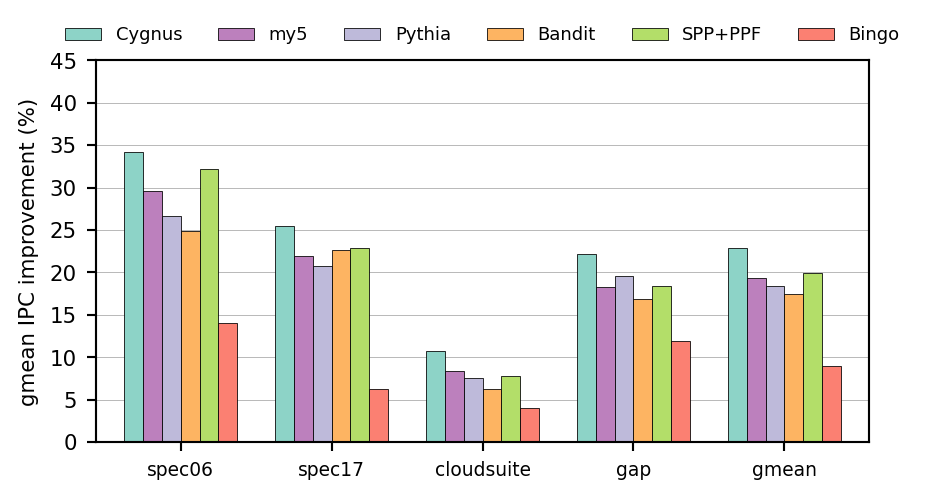

In [113]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 45),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))
plt.savefig("champsim_2022_ds3_ipc_improvement.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("champsim_2022_ds3_ipc_improvement.png", dpi=dpi, bbox_inches="tight")

### spec06

In [114]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
GemsFDTD,78.110000,62.960000,67.460000,53.980000,77.370000,26.910000
astar,6.650000,2.030000,6.660000,3.080000,7.140000,6.590000
bwaves,43.490000,20.870000,24.390000,22.090000,49.160000,12.680000
cactusADM,66.100000,41.820000,53.090000,53.270000,64.160000,17.730000
gcc,32.510000,24.700000,16.670000,15.630000,23.320000,16.040000
lbm,50.490000,49.580000,41.030000,41.970000,48.110000,23.450000
leslie3d,30.870000,25.130000,26.230000,19.060000,30.500000,11.560000
libquantum,66.850000,67.040000,49.900000,54.090000,62.830000,24.150000
mcf,11.830000,24.580000,12.980000,11.630000,8.720000,-3.230000
milc,8.870000,25.880000,13.080000,5.850000,18.410000,9.590000


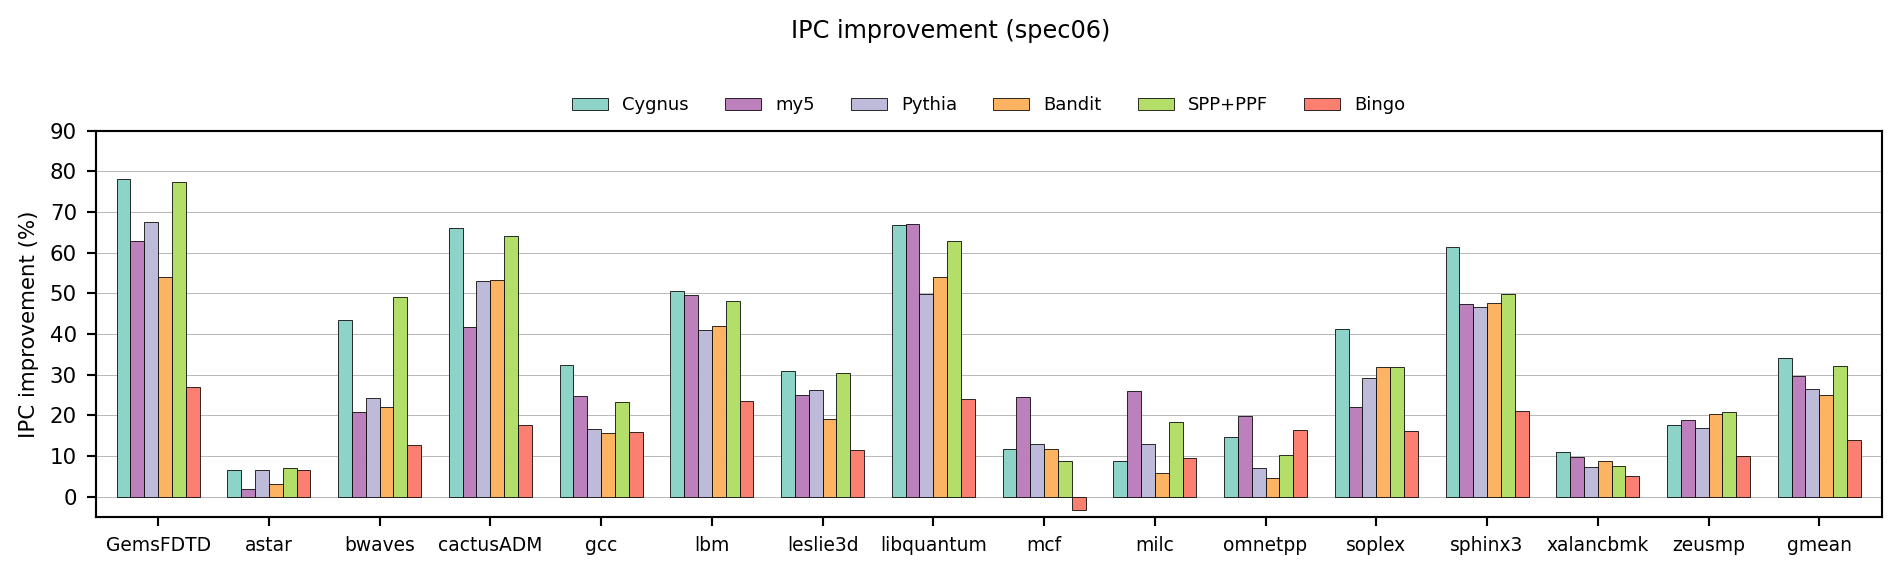

In [115]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-5, 90),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

### spec17

In [116]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
602.gcc,66.730000,64.410000,61.680000,63.670000,63.950000,24.900000
605.mcf,6.730000,10.530000,5.490000,7.460000,13.830000,-12.990000
607.cactuBSSN,28.870000,11.690000,32.860000,32.850000,26.230000,0.730000
619.lbm,22.640000,21.990000,18.320000,20.300000,20.880000,11.900000
620.omnetpp,9.370000,10.920000,4.770000,1.060000,4.080000,9.630000
623.xalancbmk,11.420000,14.320000,9.340000,12.500000,8.910000,-3.070000
627.cam4,2.350000,0.710000,1.660000,1.770000,1.460000,0.590000
628.pop2,18.370000,9.760000,13.040000,14.080000,14.620000,6.480000
649.fotonik3d,86.030000,71.520000,55.380000,69.770000,69.900000,24.340000
gmean,25.502072,21.921119,20.815793,22.689456,22.859191,6.303875


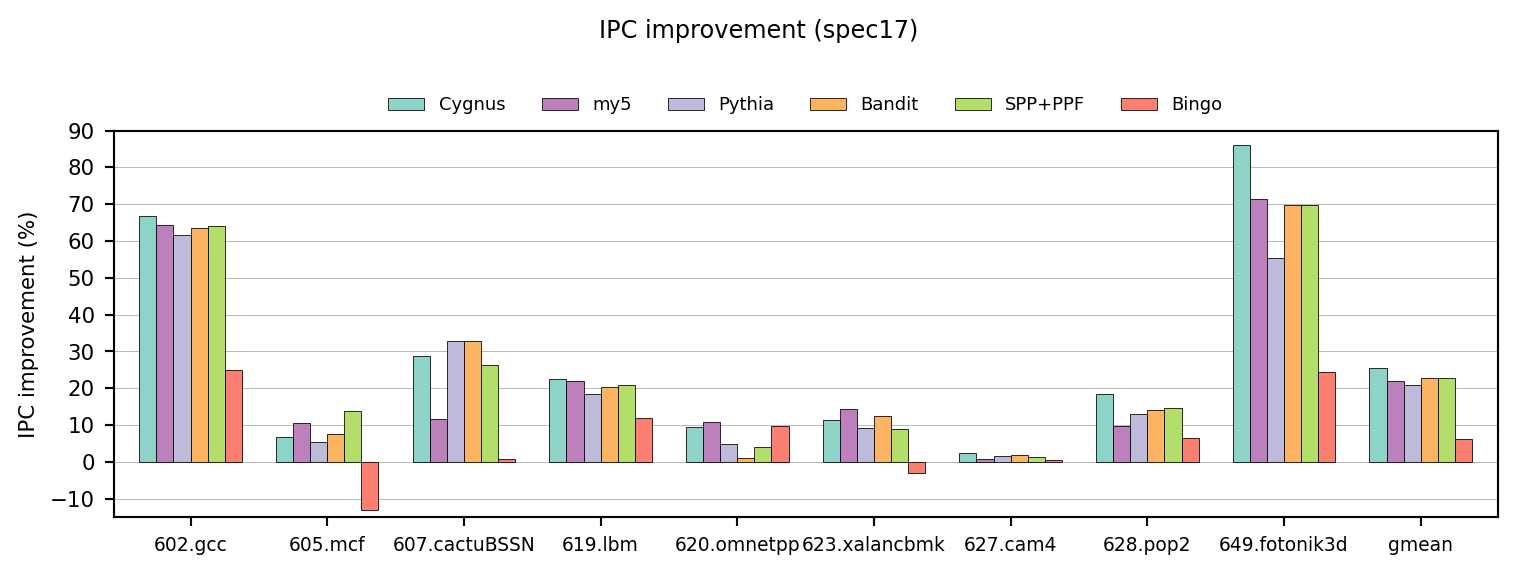

In [117]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 90),
    ytick_distance=10,
    dpi=192, figsize=(8, 3))

### cloudsuite

In [118]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
cassandra,10.470000,10.900000,10.680000,8.090000,10.44000,7.360000
classifcation,-10.550000,-1.610000,-8.430000,-8.250000,-7.63000,-10.370000
cloud9,26.300000,8.140000,13.250000,12.580000,13.13000,12.290000
nutch,20.770000,17.150000,16.780000,14.420000,16.87000,8.590000
gmean,10.801791,8.430832,7.598759,6.313568,7.76669,4.077465


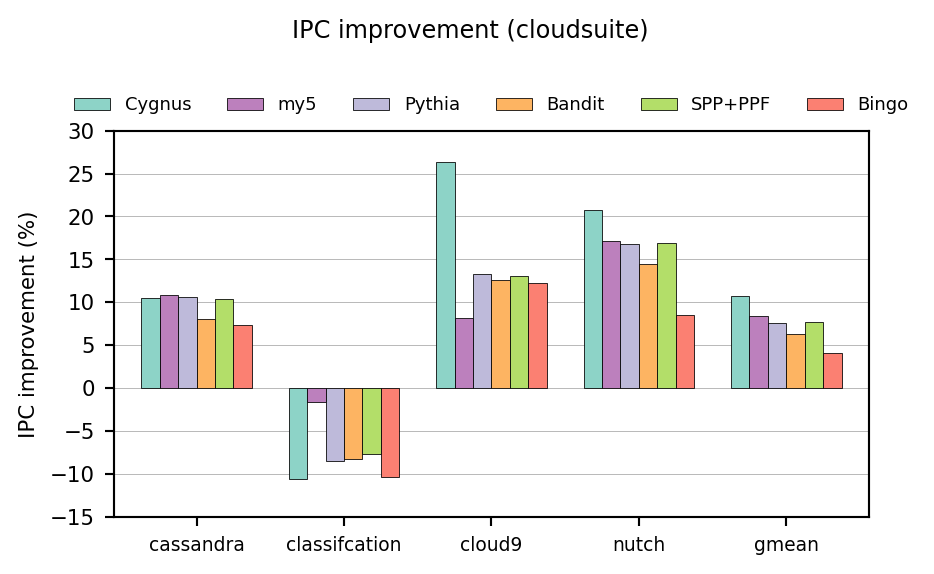

In [119]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "cloudsuite", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (cloudsuite)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 30),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))

### google

In [120]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
charlie,20.670000,10.73000,15.930000,12.130000,15.390000,8.060000
delta,24.110000,20.35000,19.310000,15.310000,26.560000,11.380000
merced,20.340000,4.93000,17.740000,14.600000,17.260000,5.710000
whiskey,12.240000,10.52000,10.590000,8.240000,11.860000,6.930000
gmean,19.258938,11.49695,15.845226,12.535695,17.644692,7.999552


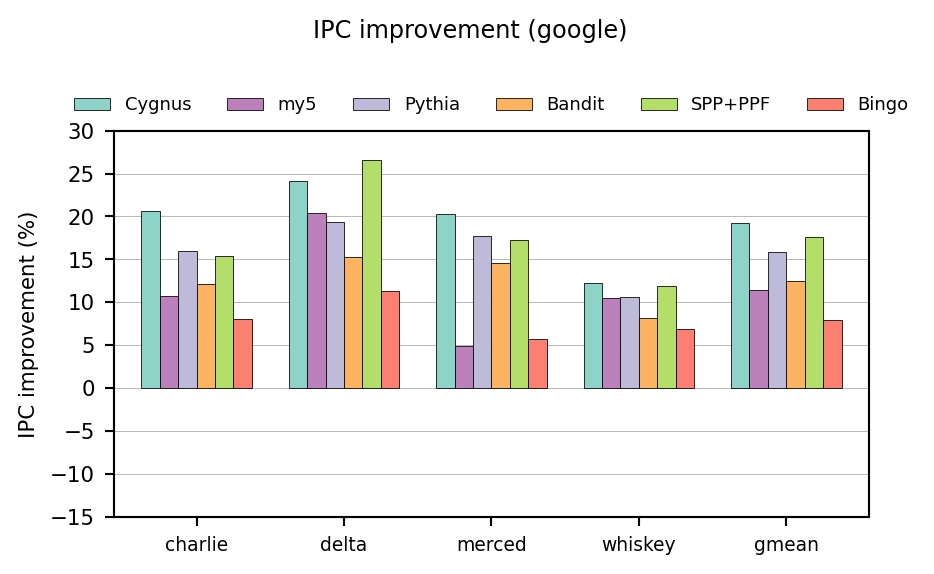

In [121]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "google", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (google)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(-15, 30),
    ytick_distance=5,
    dpi=192, figsize=(5, 3))

### gap

In [122]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
bc,11.940000,9.920000,11.620000,11.360000,10.000000,7.510000
bfs,63.080000,44.030000,47.360000,44.550000,48.380000,24.360000
cc,34.990000,34.360000,33.170000,23.360000,31.950000,14.480000
pr,2.790000,2.140000,2.750000,1.850000,2.110000,1.580000
sssp,8.210000,4.340000,8.610000,5.680000,5.410000,5.970000
tc,21.080000,21.090000,19.930000,18.950000,18.990000,18.960000
gmean,22.132069,18.329339,19.633071,16.826131,18.423984,11.868689


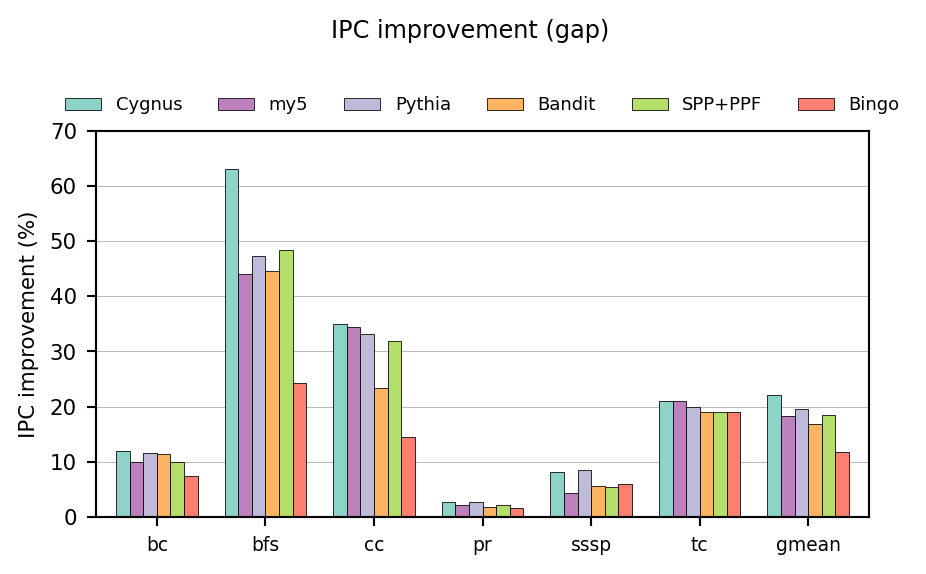

In [123]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 70),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))

### parsec

In [124]:
reload(plot)
pd.set_option("display.max_rows", 500)
plot.get_benchmark_table(
    degreedyn_1core_df, "parsec", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
canneal,5.940000,6.680000,5.960000,1.810000,4.63000,1.550000
dedup,3.740000,3.730000,3.710000,3.600000,3.72000,2.010000
facesim,15.810000,12.090000,12.170000,11.580000,12.57000,7.640000
fluidanimate,6.860000,8.890000,3.950000,1.470000,7.89000,6.930000
raytrace,18.230000,12.870000,16.850000,16.530000,17.21000,7.920000
streamcluster,9.200000,9.050000,7.240000,5.380000,9.15000,5.680000
gmean,9.838087,8.840637,8.211866,6.588829,9.09843,5.256384


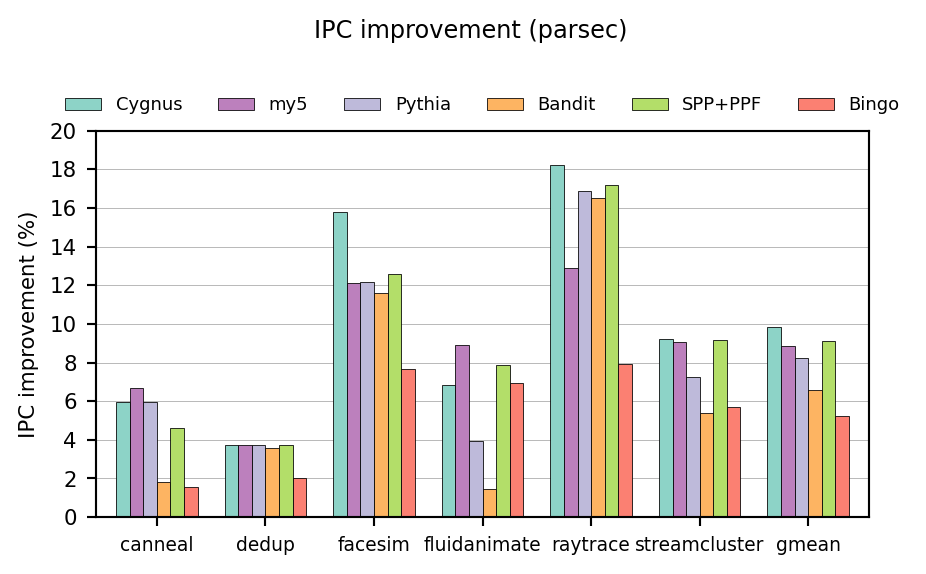

In [125]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "parsec", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (parsec)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 20),
    ytick_distance=2,
    dpi=192, figsize=(5, 3))

### ligra

In [126]:
reload(plot)
pd.set_option("display.max_rows", 500)
plot.get_benchmark_table(
    degreedyn_1core_df, "ligra", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
BC,33.160000,32.630000,30.24000,30.190000,31.840000,14.090000
BFS,35.790000,31.330000,31.60000,27.010000,30.990000,17.870000
BFS-Bitvector,20.250000,17.960000,19.20000,18.490000,18.030000,11.150000
BFSCC,29.510000,27.460000,27.03000,25.960000,27.590000,14.760000
BellmanFord,31.880000,31.640000,29.13000,29.770000,30.620000,12.610000
CF,33.460000,32.520000,28.67000,29.210000,32.690000,14.110000
Components,28.650000,29.020000,26.24000,26.030000,27.570000,11.410000
Components-Shortcut,23.820000,23.850000,22.69000,22.420000,22.770000,10.240000
MIS,37.720000,37.570000,34.58000,34.570000,35.860000,15.390000
PageRank,25.050000,26.880000,22.17000,21.590000,24.610000,5.730000


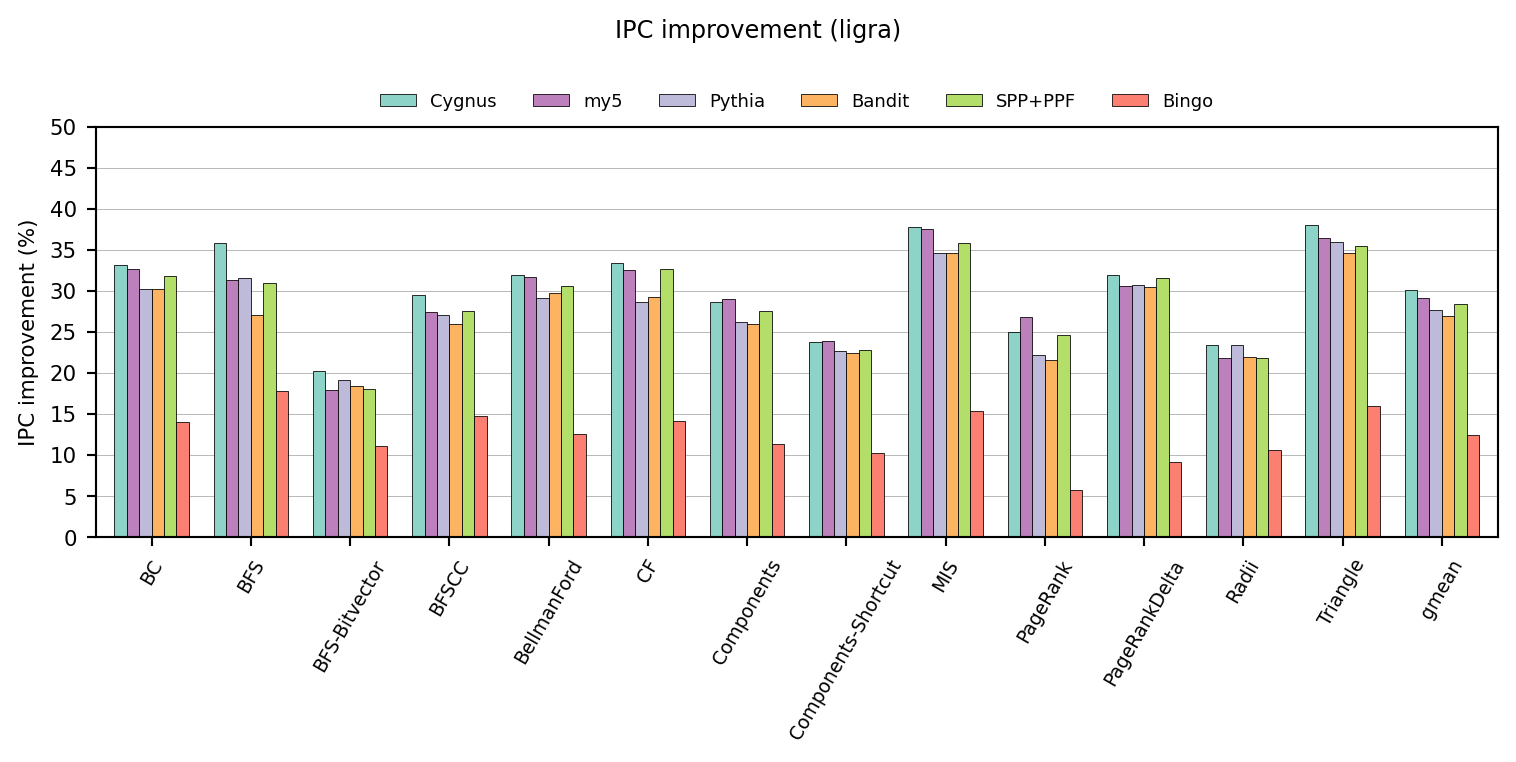

In [127]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "ligra", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="IPC improvement (ligra)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(8, 4))

### gap_real

In [128]:
reload(plot)
pd.set_option("display.max_rows", 500)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
bc__belgium_osm.mtx,6.050000,2.320000,5.260000,0.250000,6.32000,-37.470000
bc__cnr-2000.mtx,1.870000,1.990000,1.630000,1.910000,1.84000,0.830000
bc__coAuthorsCiteseer.mtx,5.360000,2.910000,5.690000,0.380000,5.16000,1.560000
bc__coPapersCiteseer.mtx,13.780000,11.710000,12.510000,10.150000,12.88000,8.500000
bc__com-Youtube.mtx,8.280000,4.310000,8.570000,6.870000,7.23000,-3.320000
bc__dblp-2010.mtx,9.770000,3.910000,9.430000,4.070000,8.81000,4.060000
bc__luxembourg_osm.mtx,10.580000,4.930000,10.560000,6.530000,12.74000,17.510000
bc__netherlands_osm.mtx,7.220000,2.320000,6.460000,4.200000,5.84000,-24.430000
bc__soc-LiveJournal1.mtx,1.590000,1.690000,2.010000,1.030000,1.94000,-3.990000
bc__sx-stackoverflow.mtx,1.430000,1.770000,1.580000,1.500000,1.70000,-6.400000


#### Average per benchmark

In [129]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=["gap_real__bc", "gap_real__bfs", "gap_real__cc", "gap_real__pr", "gap_real"],
    add_mean=False)

,gap_real__bc,gap_real__bfs,gap_real__cc,gap_real__pr,gap_real
Cygnus,5.54,17.44,29.32,15.04,16.53
my5,3.31,14.44,25.89,9.82,13.07
Pythia,5.42,14.53,24.34,11.76,13.81
Bandit,3.07,14.10,21.18,10.36,11.99
SPP+PPF,5.46,15.04,24.82,9.20,13.40
Bingo,-5.59,4.25,11.72,6.80,4.10


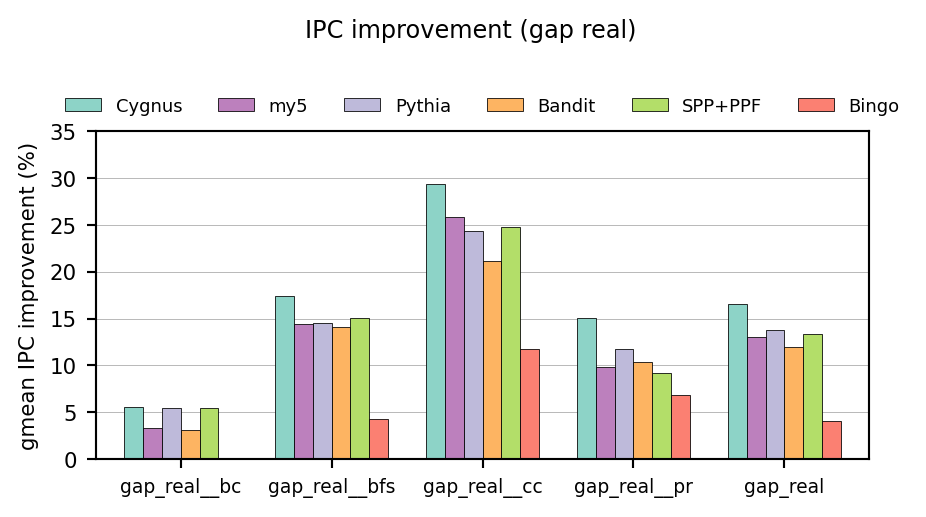

In [130]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=["gap_real__bc", "gap_real__bfs", "gap_real__cc", "gap_real__pr", "gap_real"],
    add_mean=False,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="IPC improvement (gap real)",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 35),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))

#### bc

In [131]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real__bc", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
bc__belgium_osm.mtx,6.050000,2.32000,5.260000,0.250000,6.320000,-37.470000
bc__cnr-2000.mtx,1.870000,1.99000,1.630000,1.910000,1.840000,0.830000
bc__coAuthorsCiteseer.mtx,5.360000,2.91000,5.690000,0.380000,5.160000,1.560000
bc__coPapersCiteseer.mtx,13.780000,11.71000,12.510000,10.150000,12.880000,8.500000
bc__com-Youtube.mtx,8.280000,4.31000,8.570000,6.870000,7.230000,-3.320000
bc__dblp-2010.mtx,9.770000,3.91000,9.430000,4.070000,8.810000,4.060000
bc__luxembourg_osm.mtx,10.580000,4.93000,10.560000,6.530000,12.740000,17.510000
bc__netherlands_osm.mtx,7.220000,2.32000,6.460000,4.200000,5.840000,-24.430000
bc__soc-LiveJournal1.mtx,1.590000,1.69000,2.010000,1.030000,1.940000,-3.990000
bc__sx-stackoverflow.mtx,1.430000,1.77000,1.580000,1.500000,1.700000,-6.400000


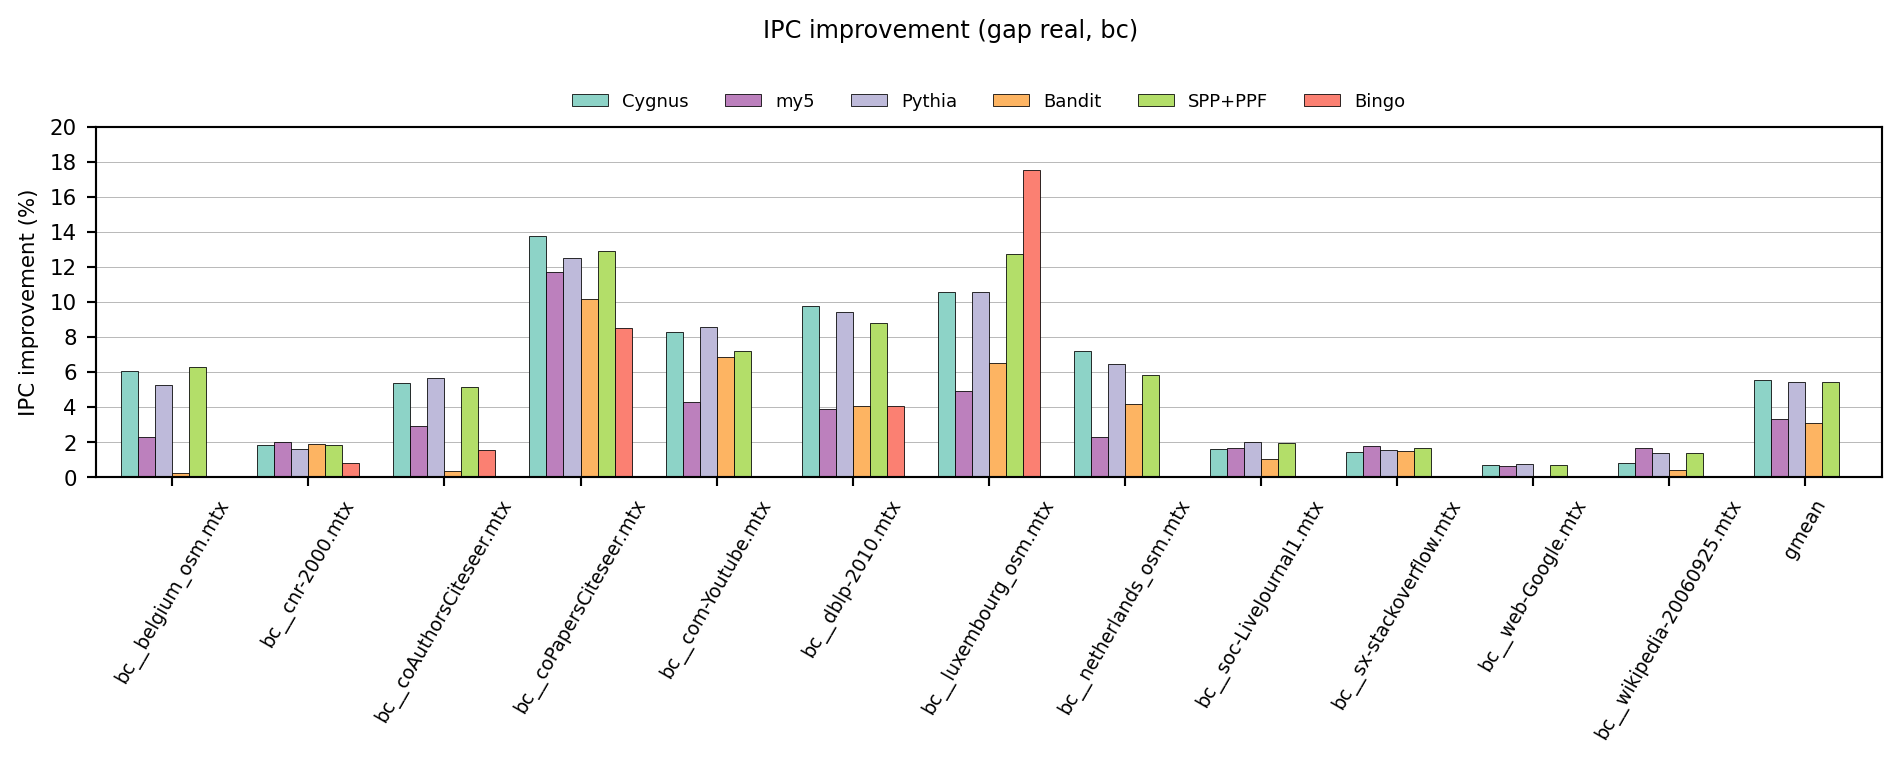

In [132]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap_real__bc", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="IPC improvement (gap real, bc)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 20),
    ytick_distance=2,
    dpi=192, figsize=(10, 4))

#### bfs

In [133]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real__bfs", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
bfs__belgium_osm.mtx,5.420000,1.540000,5.0800,0.180000,7.150000,-31.090000
bfs__cnr-2000.mtx,4.740000,4.760000,3.8700,4.350000,4.580000,1.950000
bfs__coAuthorsCiteseer.mtx,34.530000,29.570000,26.9000,29.770000,26.970000,14.780000
bfs__coPapersCiteseer.mtx,16.430000,15.000000,13.8900,14.310000,14.100000,6.900000
bfs__com-Youtube.mtx,35.690000,32.640000,29.2400,32.770000,30.660000,13.910000
bfs__dblp-2010.mtx,42.930000,40.140000,38.0900,39.950000,38.570000,17.440000
bfs__luxembourg_osm.mtx,13.270000,6.280000,9.3100,3.270000,11.390000,17.400000
bfs__netherlands_osm.mtx,10.080000,3.090000,8.4500,6.350000,8.700000,-2.320000
bfs__soc-LiveJournal1.mtx,13.470000,10.410000,11.0100,11.940000,10.330000,6.260000
bfs__sx-stackoverflow.mtx,5.610000,5.130000,4.7800,4.970000,4.560000,1.930000


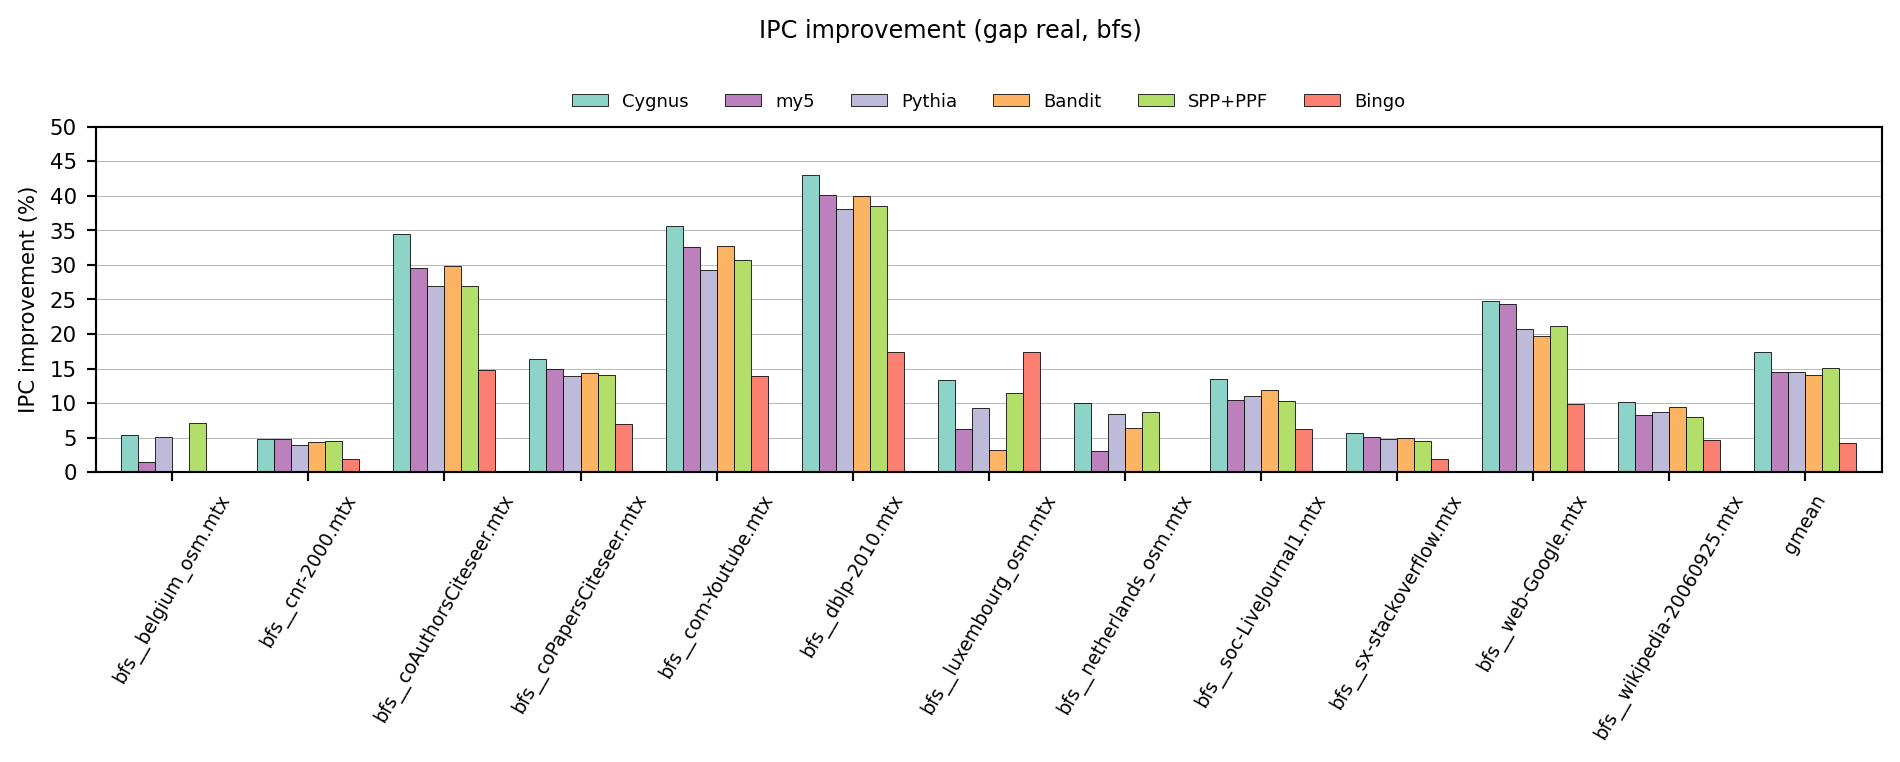

In [134]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap_real__bfs", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="IPC improvement (gap real, bfs)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(10, 4))

#### cc

In [135]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real__cc", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
cc__belgium_osm.mtx,53.140000,46.920000,44.360000,47.350000,45.940000,19.380000
cc__cnr-2000.mtx,22.490000,22.050000,19.120000,20.510000,20.910000,8.970000
cc__coAuthorsCiteseer.mtx,75.600000,62.330000,56.430000,10.590000,56.890000,32.320000
cc__coPapersCiteseer.mtx,1.870000,2.320000,1.720000,1.560000,2.100000,0.520000
cc__com-Youtube.mtx,32.570000,26.230000,28.070000,22.500000,27.140000,13.070000
cc__dblp-2010.mtx,44.980000,38.320000,37.540000,40.090000,37.750000,18.300000
cc__luxembourg_osm.mtx,48.420000,45.120000,41.770000,42.150000,44.650000,18.330000
cc__netherlands_osm.mtx,64.480000,58.500000,51.210000,53.080000,50.960000,22.160000
cc__soc-LiveJournal1.mtx,6.810000,4.860000,5.850000,5.890000,5.550000,2.990000
cc__sx-stackoverflow.mtx,5.070000,4.820000,4.480000,4.730000,4.540000,0.870000


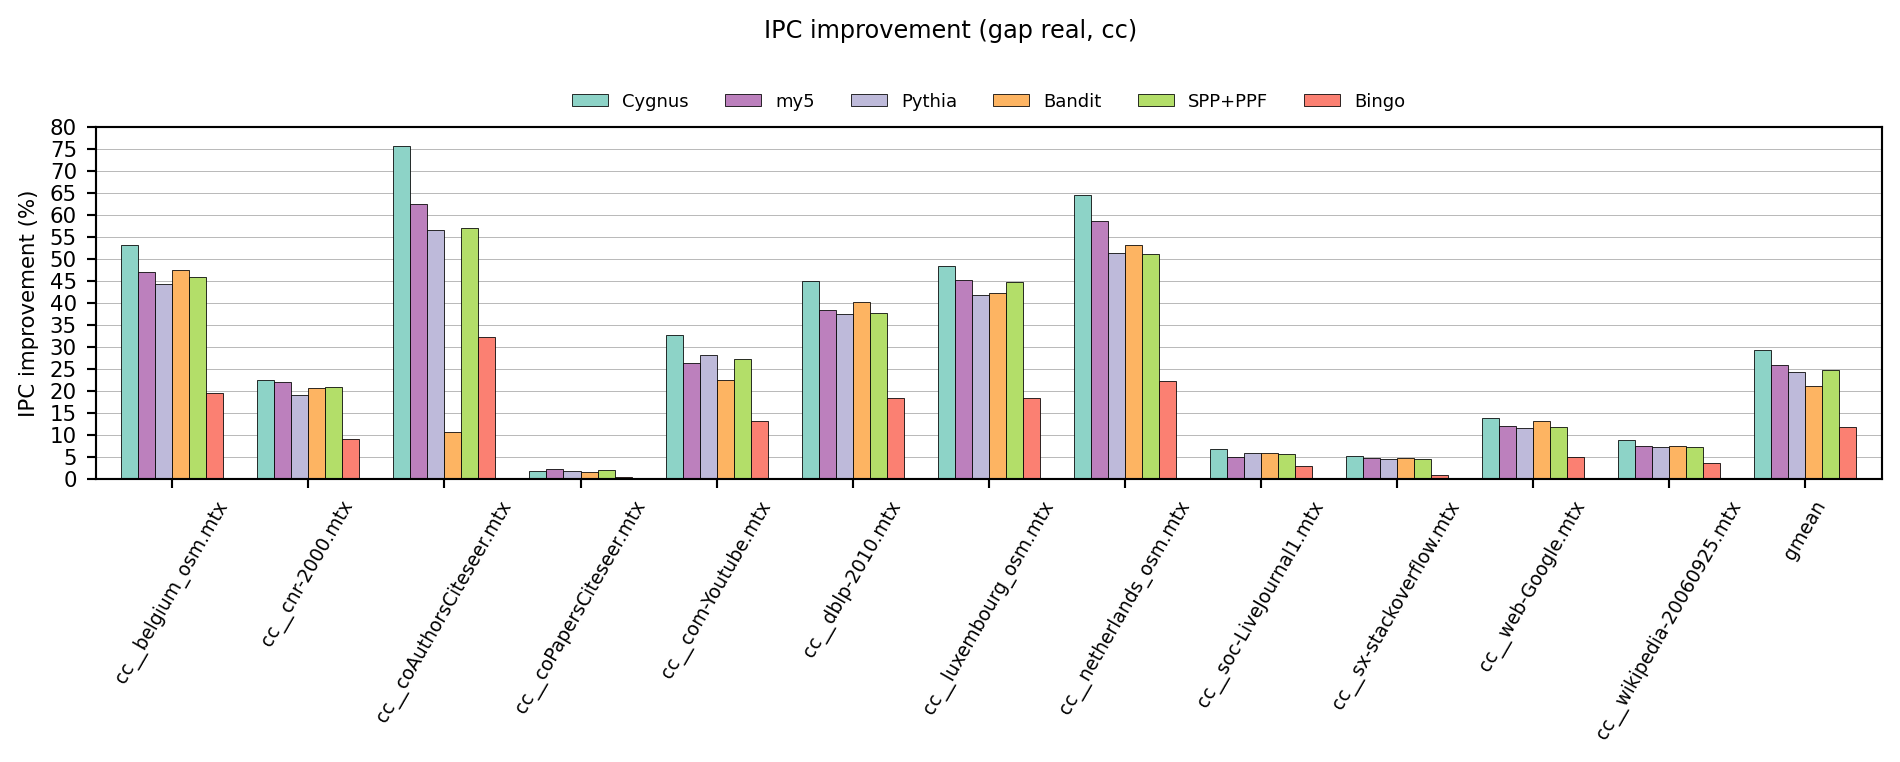

In [136]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap_real__cc", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="IPC improvement (gap real, cc)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 80),
    ytick_distance=5,
    dpi=192, figsize=(10, 4))

#### pr

In [137]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real__pr", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
pr__belgium_osm.mtx,26.900000,18.620000,19.650000,16.360000,18.970000,23.270000
pr__cnr-2000.mtx,9.730000,8.260000,7.940000,6.810000,8.080000,4.990000
pr__coAuthorsCiteseer.mtx,18.040000,1.830000,15.470000,3.690000,5.770000,21.350000
pr__coPapersCiteseer.mtx,10.450000,3.780000,6.710000,4.100000,8.040000,9.670000
pr__com-Youtube.mtx,12.960000,4.690000,11.060000,9.000000,5.470000,9.940000
pr__dblp-2010.mtx,26.030000,13.350000,18.030000,20.810000,13.110000,23.550000
pr__luxembourg_osm.mtx,41.110000,39.450000,35.740000,36.920000,31.360000,25.380000
pr__netherlands_osm.mtx,43.440000,33.720000,31.450000,29.880000,21.540000,22.300000
pr__soc-LiveJournal1.mtx,4.630000,1.110000,3.970000,2.510000,2.780000,-3.410000
pr__sx-stackoverflow.mtx,-3.800000,0.250000,-3.920000,0.130000,-0.990000,-23.640000


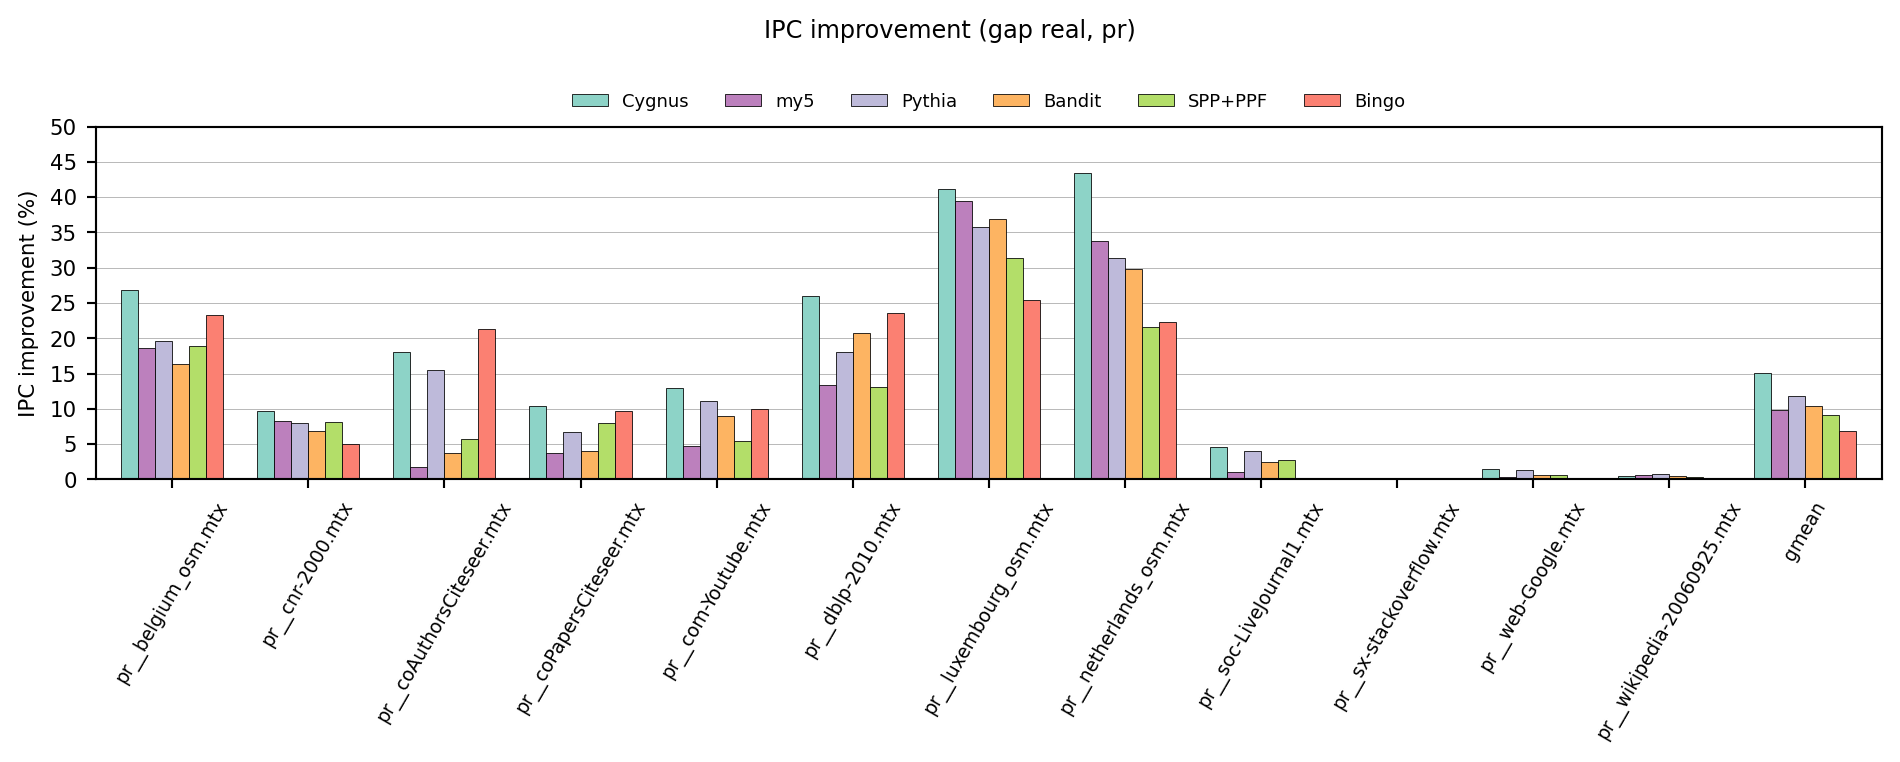

In [138]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap_real__pr", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="IPC improvement (gap real, pr)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(10, 4))

## Prefetch accuracy

In [139]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cache.L2C.amean.prefetch_accuracy",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,amean
Cygnus,42.54,35.35,20.69,24.66,30.8100
my5,19.03,NaN,10.96,12.49,NaN
Pythia,30.96,19.56,20.20,20.45,22.7925
Bandit,31.46,17.78,18.28,19.52,21.7600
SPP+PPF,55.10,42.06,33.34,37.80,42.0750
Bingo,59.18,NaN,27.84,25.97,NaN


In [140]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cache.L2C.amean.prefetch_accuracy_timely",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,amean
Cygnus,35.17,32.86,18.91,23.80,27.6850
my5,15.39,NaN,9.84,12.05,NaN
Pythia,22.70,15.87,17.83,19.60,19.0000
Bandit,22.23,14.90,15.90,18.44,17.8675
SPP+PPF,43.10,35.64,29.16,35.57,35.8675
Bingo,47.42,NaN,24.93,25.48,NaN


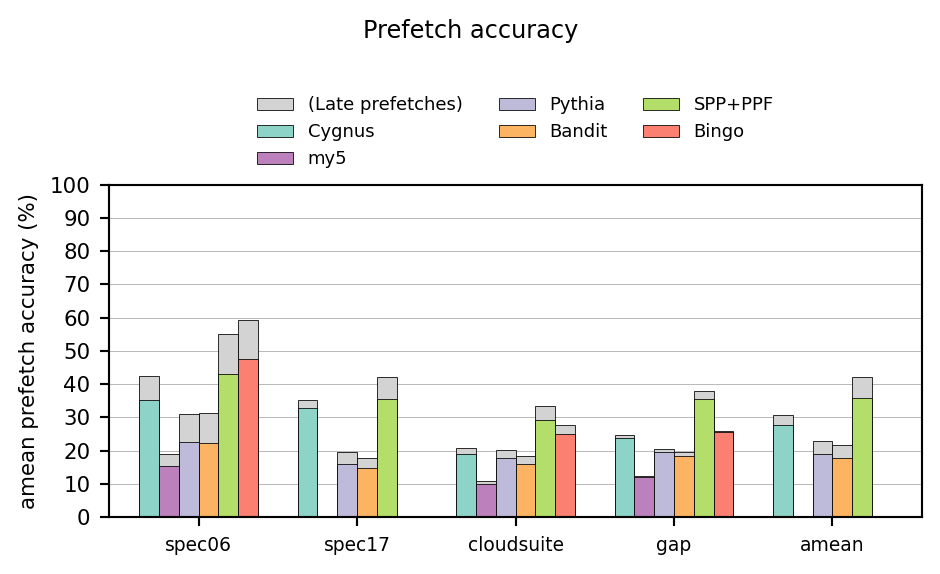

In [141]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.prefetch_accuracy_timely",
    secondary_statistic_names=["cache.L2C.amean.prefetch_accuracy"],
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_narrow,
    label_kwargs=degreedyn_1core_label_kwargs,
    secondary_labels=["(Late prefetches)"],
    add_suptitle=True,
    suptitle="Prefetch accuracy",
    add_xlabel=False,
    ylabel="amean prefetch accuracy (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))

### spec06

In [142]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.prefetch_accuracy",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
GemsFDTD,62.920,16.560000,31.540000,40.250,70.31,77.760000
astar,21.300,9.330000,20.870000,15.420,26.11,19.440000
bwaves,58.930,12.690000,32.880000,48.640,78.26,99.960000
cactusADM,30.190,9.070000,13.640000,32.800,43.18,99.540000
gcc,18.430,13.220000,29.990000,24.260,37.25,26.790000
lbm,99.760,19.500000,41.810000,42.650,93.70,100.000000
leslie3d,43.200,18.730000,28.450000,39.010,67.76,90.370000
libquantum,99.990,38.350000,68.570000,52.090,97.82,100.000000
mcf,33.190,51.060000,31.750000,30.280,34.45,12.340000
milc,49.990,25.210000,44.580000,49.190,81.31,99.790000


In [143]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.prefetch_accuracy_timely",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
GemsFDTD,60.020,16.050,28.460000,31.080000,63.270000,74.350
astar,21.020,9.000,19.930000,13.930000,25.230000,19.280
bwaves,57.810,12.210,29.780000,35.910000,76.580000,95.690
cactusADM,30.080,9.010,13.330000,30.860000,42.680000,98.680
gcc,17.200,12.870,28.330000,22.580000,33.690000,25.270
lbm,97.340,18.580,35.630000,37.190000,88.140000,96.100
leslie3d,35.390,14.050,17.590000,19.720000,49.890000,61.660
libquantum,43.860,10.430,16.430000,12.820000,32.950000,31.350
mcf,31.410,48.080,30.280000,29.580000,32.260000,12.200
milc,24.930,15.330,18.660000,15.930000,38.970000,49.920


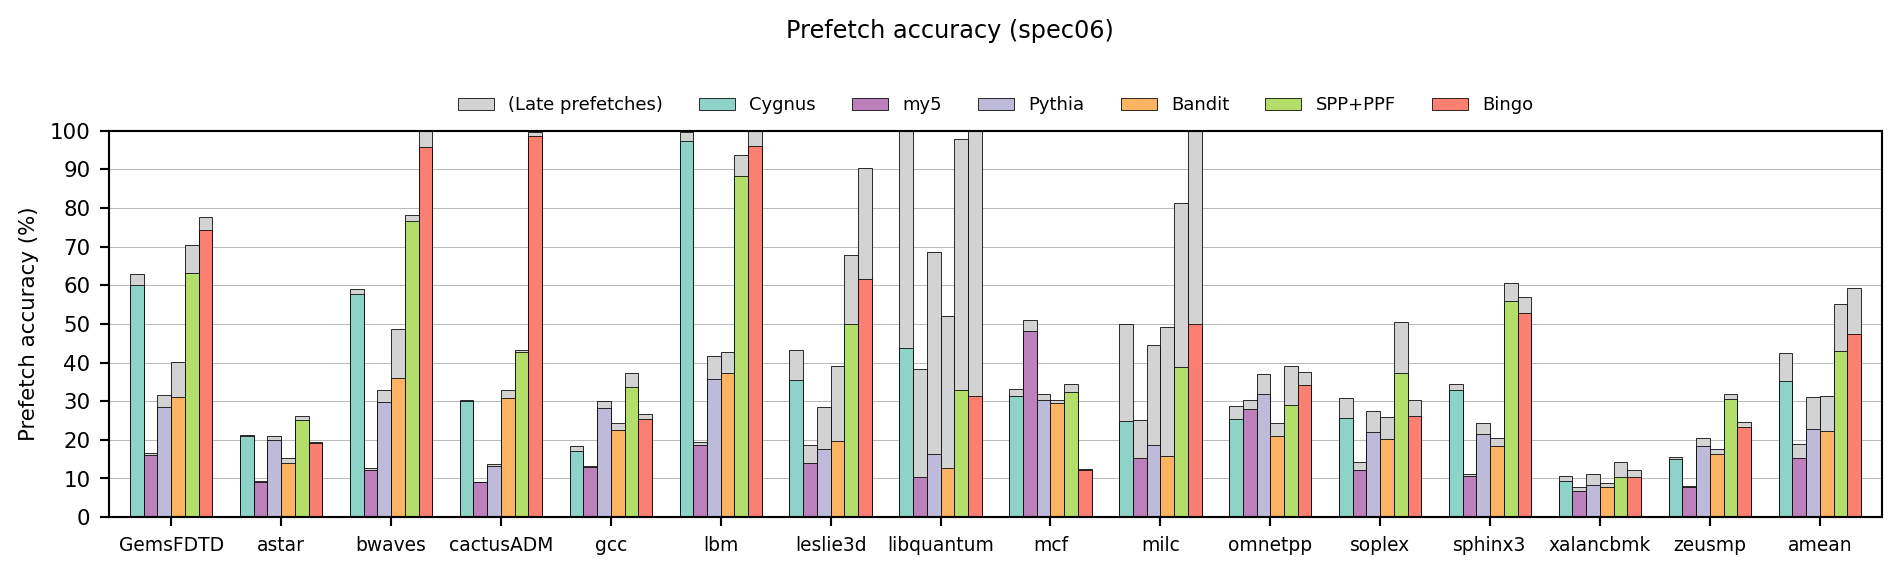

In [144]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.prefetch_accuracy_timely",
    secondary_statistic_names=["cache.L2C.amean.prefetch_accuracy"],
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs,
    secondary_labels=["(Late prefetches)"],
    add_suptitle=True,
    suptitle="Prefetch accuracy (spec06)",
    add_xlabel=False,
    ylabel="Prefetch accuracy (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

### spec17

In [145]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec17", "cache.L2C.amean.prefetch_accuracy",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
602.gcc,31.130000,5.25,11.950000,8.690000,41.300000,66.45
605.mcf,27.920000,8.17,21.920000,27.910000,56.030000,25.09
607.cactuBSSN,17.710000,3.47,16.120000,12.380000,21.420000,15.67
619.lbm,99.220000,23.77,50.570000,45.210000,95.240000,100.00
620.omnetpp,25.590000,28.94,26.640000,30.170000,29.150000,27.11
623.xalancbmk,21.690000,4.55,8.870000,9.190000,26.820000,30.85
627.cam4,8.350000,2.63,5.980000,5.360000,15.030000,25.93
628.pop2,28.440000,8.22,13.060000,9.830000,38.060000,61.42
649.fotonik3d,58.120000,NaN,20.880000,11.250000,55.510000,NaN
amean,35.352222,NaN,19.554444,17.776667,42.062222,NaN


In [146]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec17", "cache.L2C.amean.prefetch_accuracy_timely",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
602.gcc,31.010000,5.24,11.570000,8.500000,40.990000,66.30
605.mcf,22.890000,7.35,18.370000,23.650000,44.260000,20.03
607.cactuBSSN,17.700000,3.46,16.110000,12.380000,21.380000,15.63
619.lbm,89.020000,19.28,32.710000,35.330000,73.660000,74.37
620.omnetpp,23.990000,27.11,23.890000,22.920000,22.410000,25.49
623.xalancbmk,20.870000,4.30,8.150000,8.140000,25.420000,29.25
627.cam4,7.790000,2.24,5.030000,4.780000,11.400000,20.06
628.pop2,25.720000,7.08,9.830000,8.080000,31.400000,50.54
649.fotonik3d,56.720000,NaN,17.210000,10.350000,49.870000,NaN
amean,32.856667,NaN,15.874444,14.903333,35.643333,NaN


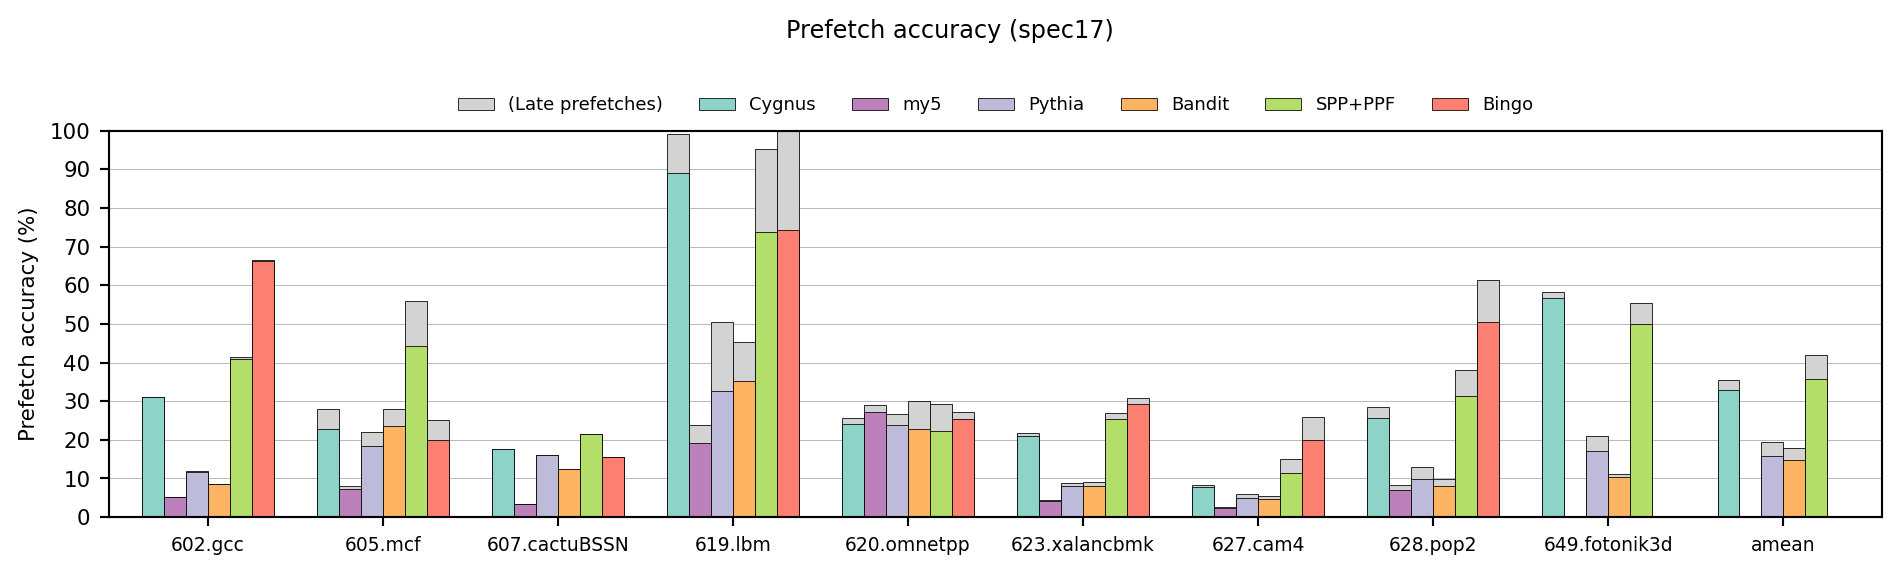

In [147]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec17", "cache.L2C.amean.prefetch_accuracy_timely",
    secondary_statistic_names=["cache.L2C.amean.prefetch_accuracy"],
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs,
    secondary_labels=["(Late prefetches)"],
    add_suptitle=True,
    suptitle="Prefetch accuracy (spec17)",
    add_xlabel=False,
    ylabel="Prefetch accuracy (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

## Prefetch coverage

In [148]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cache.L2C.amean.prefetch_coverage",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,amean
Cygnus,44.53,26.66,37.49,43.50,38.0450
my5,34.66,29.65,30.15,42.54,34.2500
Pythia,35.32,24.29,29.40,40.53,32.3850
Bandit,32.41,29.05,24.45,37.81,30.9300
SPP+PPF,41.39,14.11,30.39,41.25,31.7850
Bingo,22.45,-24.39,22.39,26.86,11.8275


In [149]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cache.L2C.amean.prefetch_coverage_untimely",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,amean
Cygnus,53.37,30.40,44.16,46.61,43.6350
my5,43.54,32.28,34.12,44.25,38.5475
Pythia,47.63,31.08,36.34,44.37,39.8550
Bandit,45.04,33.23,30.40,42.32,37.7475
SPP+PPF,52.53,21.89,37.65,44.61,39.1700
Bingo,28.01,-19.38,26.64,29.25,16.1300


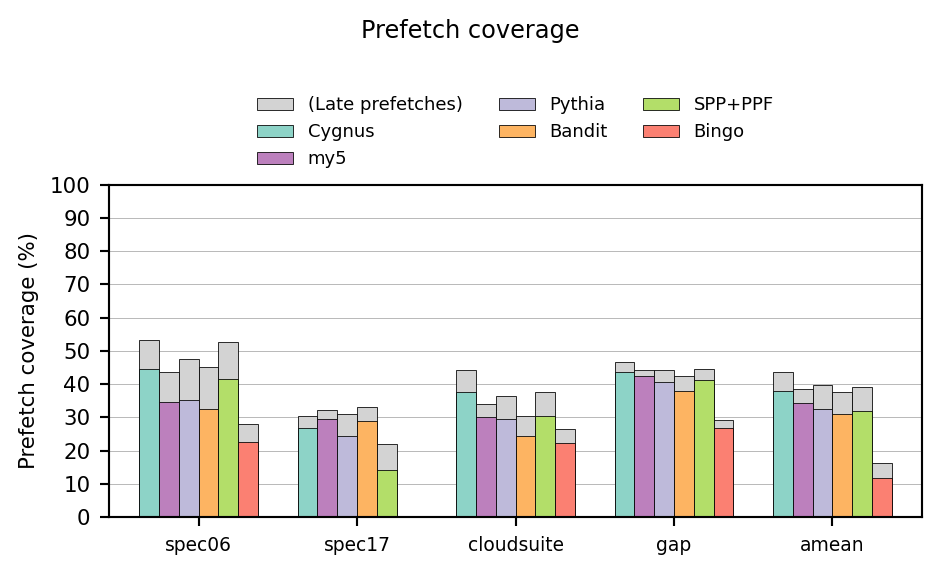

In [150]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.prefetch_coverage",
    secondary_statistic_names=["cache.L2C.amean.prefetch_coverage_untimely"],
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_narrow,
    label_kwargs=degreedyn_1core_label_kwargs,
    secondary_labels=["(Late prefetches)"],
    add_suptitle=True,
    suptitle="Prefetch coverage",
    add_xlabel=False,
    ylabel="Prefetch coverage (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))

### spec06

In [151]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.prefetch_coverage",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
GemsFDTD,83.450000,67.460000,77.940,64.830,82.170000,43.550000
astar,14.890000,13.520000,15.820,12.580,17.490000,5.080000
bwaves,68.260000,29.570000,47.240,42.470,72.530000,28.970000
cactusADM,68.260000,42.640000,61.800,60.940,67.660000,34.260000
gcc,38.880000,30.750000,25.370,23.370,32.150000,24.370000
lbm,23.600000,23.160000,19.890,20.020,22.680000,11.410000
leslie3d,56.700000,41.400000,41.870,30.000,52.480000,24.720000
libquantum,42.470000,27.380000,23.780,24.030,32.230000,15.300000
mcf,15.820000,23.090000,16.720,14.080,12.680000,-7.880000
milc,25.220000,25.650000,17.270,9.150,24.740000,10.910000


In [152]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.prefetch_coverage_untimely",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
GemsFDTD,87.670000,69.810000,86.930000,81.810000,91.600,45.630
astar,15.300000,13.790000,16.770000,12.740000,18.110,5.540
bwaves,69.840000,30.840000,52.640000,58.640000,74.540,30.570
cactusADM,68.500000,42.940000,63.210000,64.770000,68.440,34.560
gcc,41.860000,31.970000,27.190000,25.610000,35.360,25.940
lbm,24.180000,24.310000,23.330000,22.630000,24.110,11.870
leslie3d,69.880000,55.720000,68.740000,55.510000,72.030,36.460
libquantum,96.820000,97.350000,97.050000,93.240000,95.600,48.820
mcf,17.430000,24.500000,18.180000,14.470000,13.900,-6.980
milc,49.670000,45.200000,43.070000,26.440000,50.920,22.620


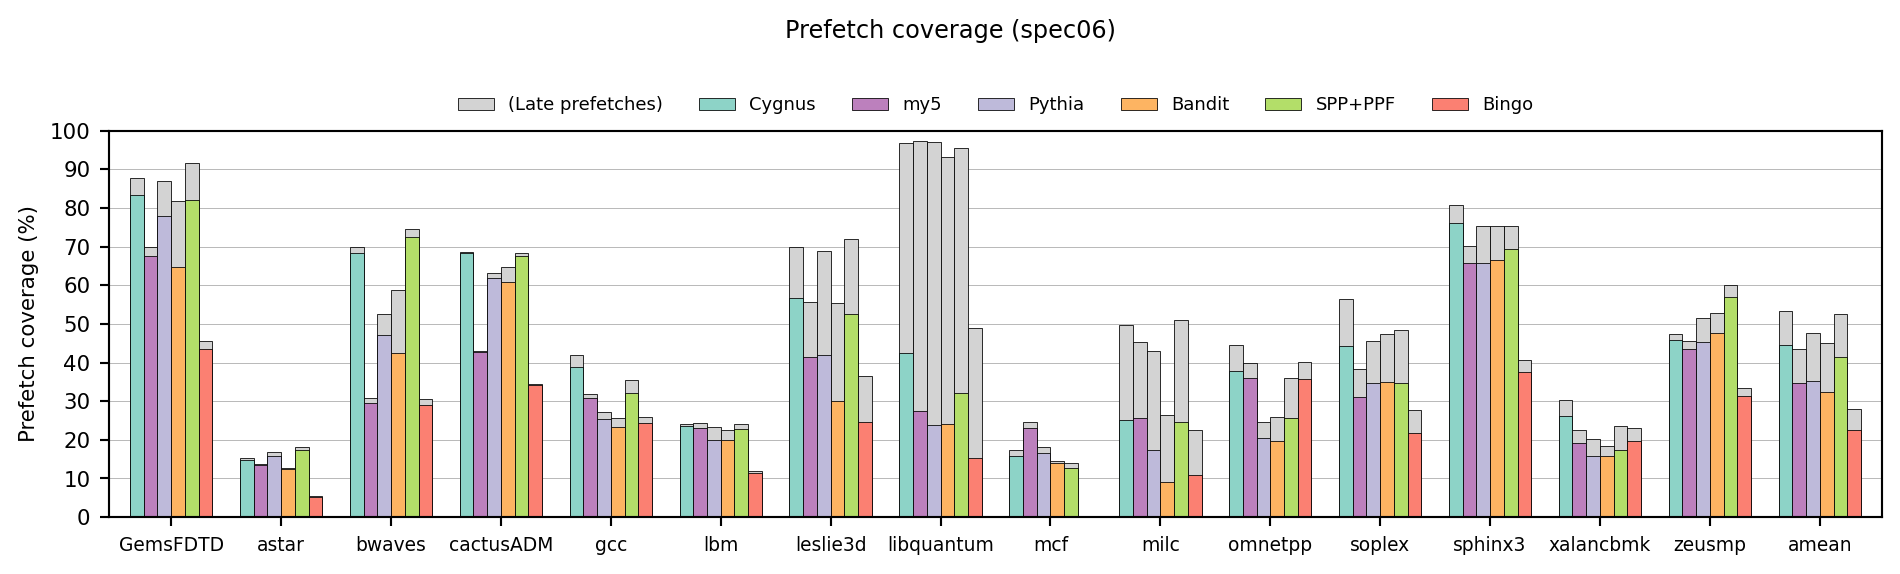

In [153]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.prefetch_coverage",
    secondary_statistic_names=["cache.L2C.amean.prefetch_coverage_untimely"],
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs,
    secondary_labels=["(Late prefetches)"],
    add_suptitle=True,
    suptitle="Prefetch coverage (spec06)",
    add_xlabel=False,
    ylabel="Prefetch coverage (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

### spec17

In [154]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec17", "cache.L2C.amean.prefetch_coverage",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
602.gcc,83.520000,77.390000,80.230000,80.210000,81.370000,42.560000
605.mcf,24.940000,26.580000,17.240000,17.230000,24.150000,9.920000
607.cactuBSSN,53.470000,25.700000,56.700000,50.600000,57.730000,6.070000
619.lbm,20.750000,19.010000,14.500000,16.800000,18.030000,8.630000
620.omnetpp,27.510000,27.120000,13.680000,3.510000,10.930000,25.700000
623.xalancbmk,-101.390000,-9.210000,-73.310000,-21.910000,-185.670000,-376.220000
627.cam4,6.580000,4.010000,6.960000,6.900000,6.260000,2.970000
628.pop2,48.420000,27.610000,39.400000,38.940000,44.780000,24.180000
649.fotonik3d,76.120000,68.610000,63.220000,69.200000,69.440000,36.700000
amean,26.657778,29.646667,24.291111,29.053333,14.113333,-24.387778


In [155]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec17", "cache.L2C.amean.prefetch_coverage_untimely",
    add_mean=True).T

,Cygnus,my5,Pythia,Bandit,SPP+PPF,Bingo
602.gcc,84.380000,77.540000,83.300000,82.200000,82.760000,42.730000
605.mcf,31.730000,28.570000,23.580000,20.240000,35.630000,14.900000
607.cactuBSSN,53.530000,25.770000,56.740000,50.620000,57.890000,6.090000
619.lbm,23.130000,23.430000,22.420000,21.410000,23.310000,11.610000
620.omnetpp,31.300000,29.770000,17.010000,6.280000,17.930000,29.080000
623.xalancbmk,-91.410000,-6.870000,-63.780000,-16.650000,-163.040000,-350.760000
627.cam4,7.570000,4.860000,8.740000,8.160000,8.840000,3.900000
628.pop2,55.430000,32.910000,54.810000,50.170000,56.060000,29.670000
649.fotonik3d,77.950000,74.500000,76.880000,76.610000,77.590000,38.350000
amean,30.401111,32.275556,31.077778,33.226667,21.885556,-19.381111


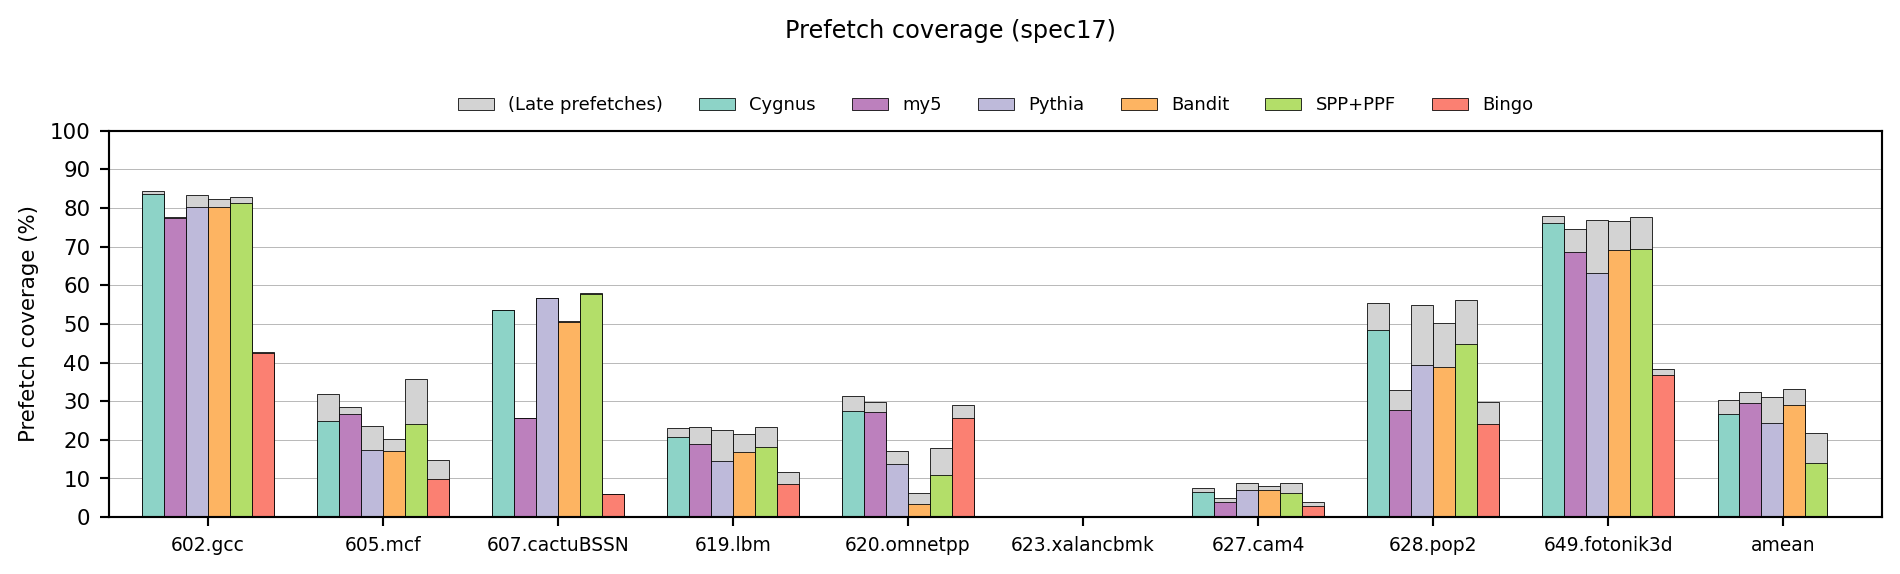

In [156]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec17", "cache.L2C.amean.prefetch_coverage",
    secondary_statistic_names=["cache.L2C.amean.prefetch_coverage_untimely"],
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs,
    secondary_labels=["(Late prefetches)"],
    add_suptitle=True,
    suptitle="Prefetch coverage (spec17)",
    add_xlabel=False,
    ylabel="Prefetch coverage (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

## Prefetch classification

In [157]:
plot.get_suite_table(
    degreedyn_1core_df, "cache.L2C.amean.prefetch_overpredictions",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,amean
Cygnus,48.87,73.26,147.68,109.87,94.920
my5,11.40,12.56,19.82,33.54,19.330
Pythia,18.53,43.39,55.87,89.09,51.720
Bandit,24.40,21.75,43.00,93.37,45.630
SPP+PPF,19.66,93.02,52.99,44.55,52.555
Bingo,74.97,241.42,94.40,257.15,166.985


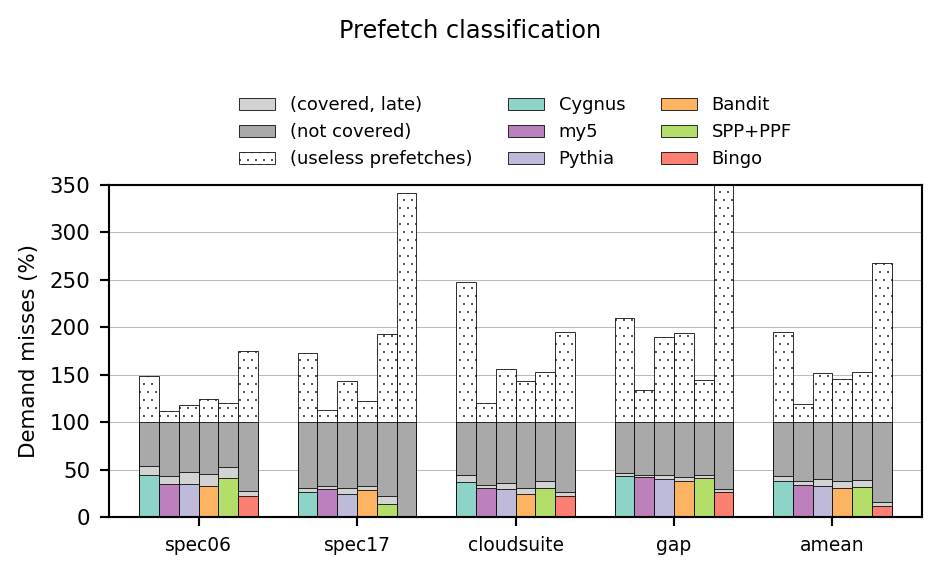

In [158]:
reload(plot)
plot.plot_suite_overpredictions(
    degreedyn_1core_df,
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_narrow,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="Prefetch classification",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(5, 3)
)
plt.savefig("champsim_2022_ds3_classification.pdf", dpi=dpi, bbox_inches="tight")
plt.savefig("champsim_2022_ds3_classification.png", dpi=dpi, bbox_inches="tight")

### spec06

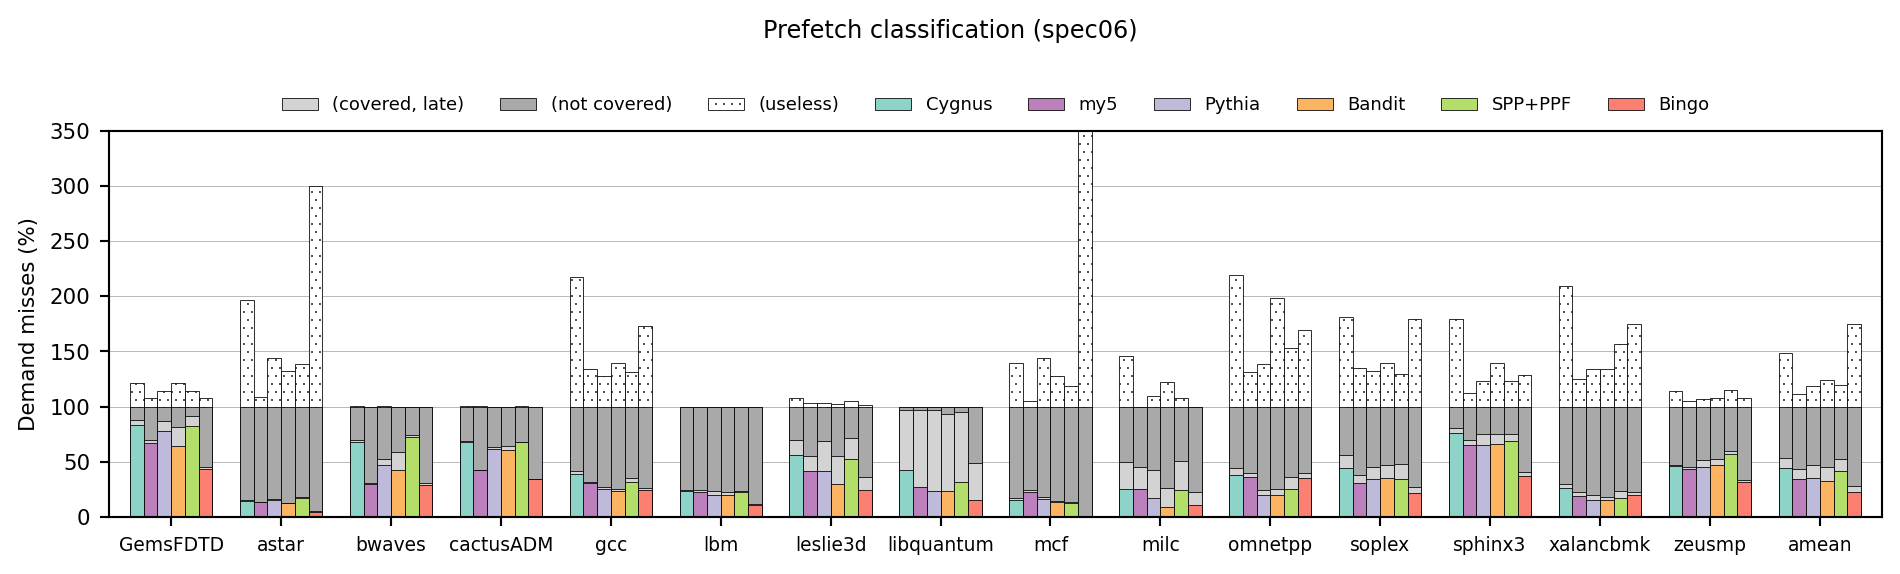

In [159]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "spec06",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="Prefetch classification (spec06)",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(10, 3)
)

### spec17

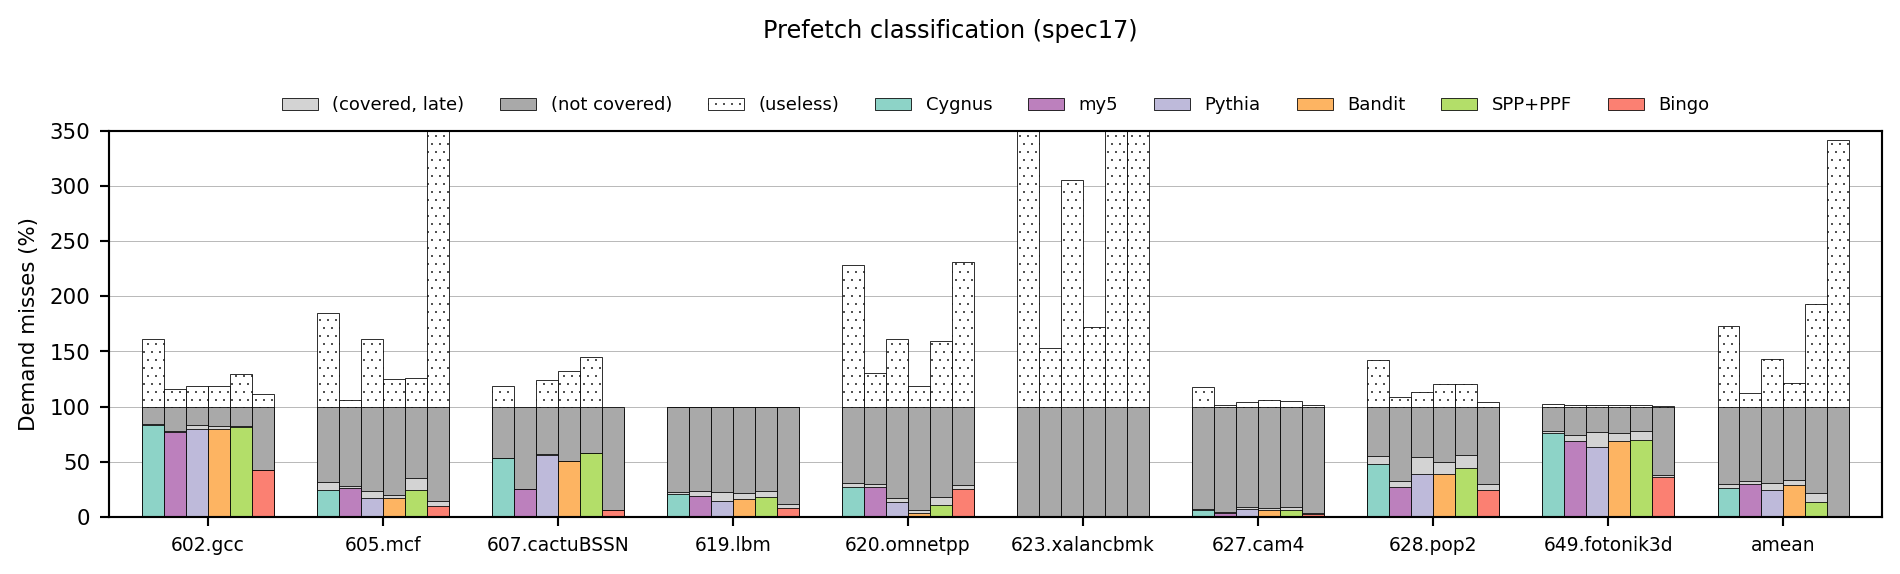

In [160]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "spec17",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="Prefetch classification (spec17)",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(10, 3)
)

### cloudsuite

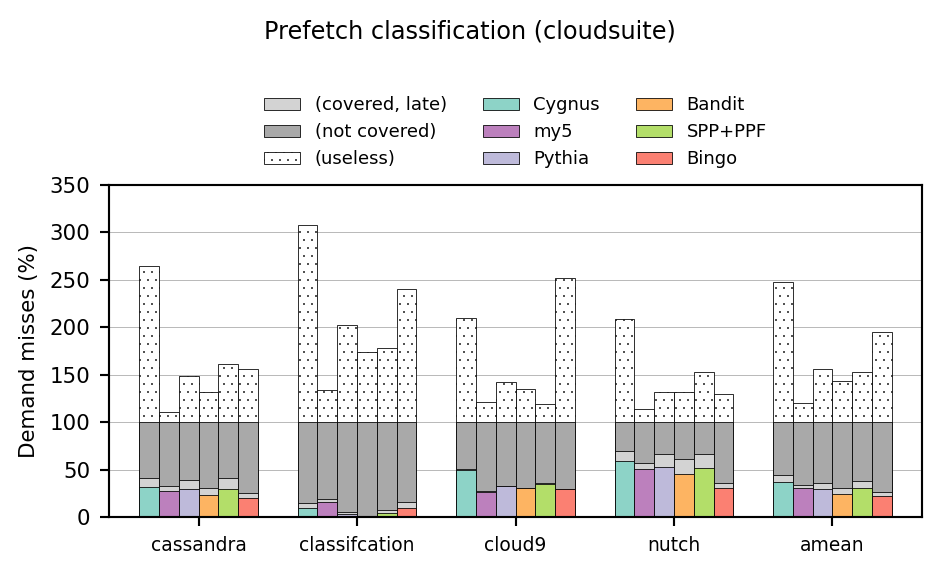

In [161]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "cloudsuite",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_narrow,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="Prefetch classification (cloudsuite)",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(5, 3)
)

### parsec

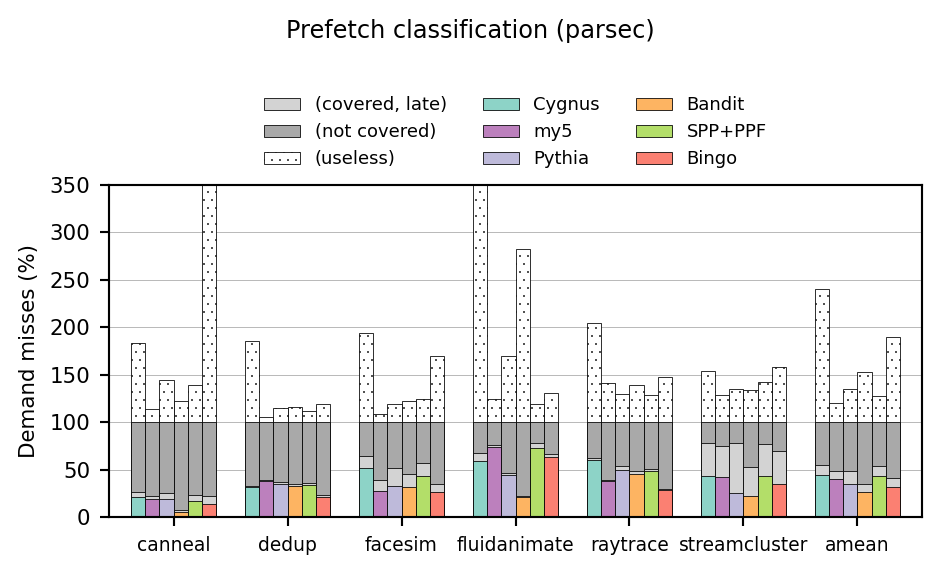

In [162]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "parsec",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_narrow,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=True,
    suptitle="Prefetch classification (parsec)",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(5, 3)
)

### ligra

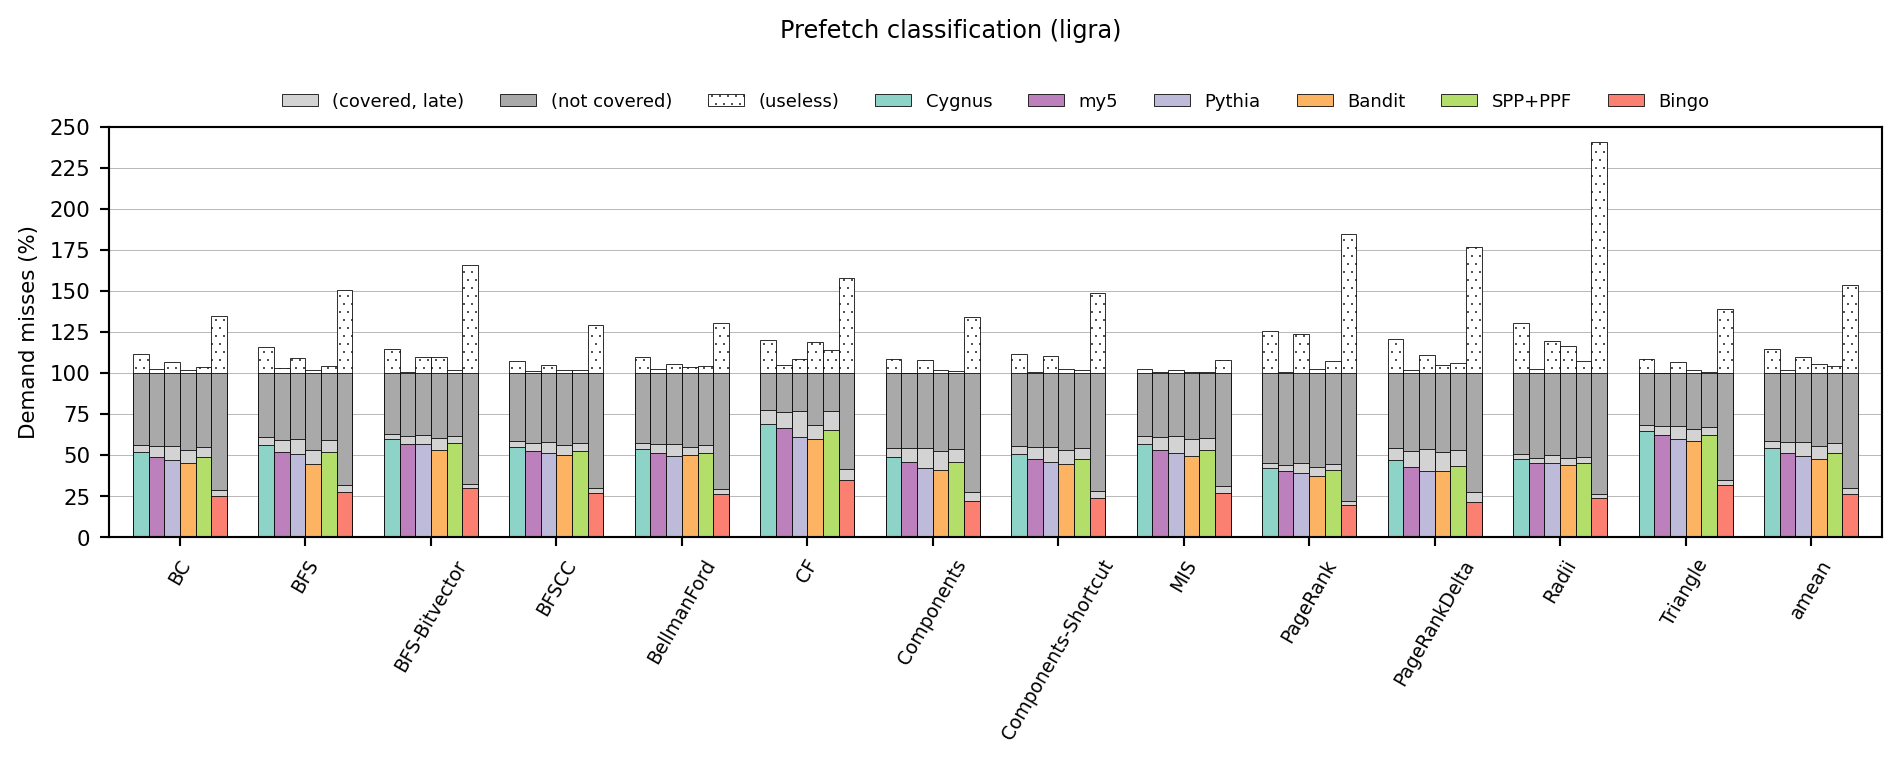

In [163]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "ligra",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="Prefetch classification (ligra)",
    add_xlabel=False,
    ylim=(0, 250),
    ytick_distance=25,
    dpi=192, figsize=(10, 4)
)

### gap_real

#### bc

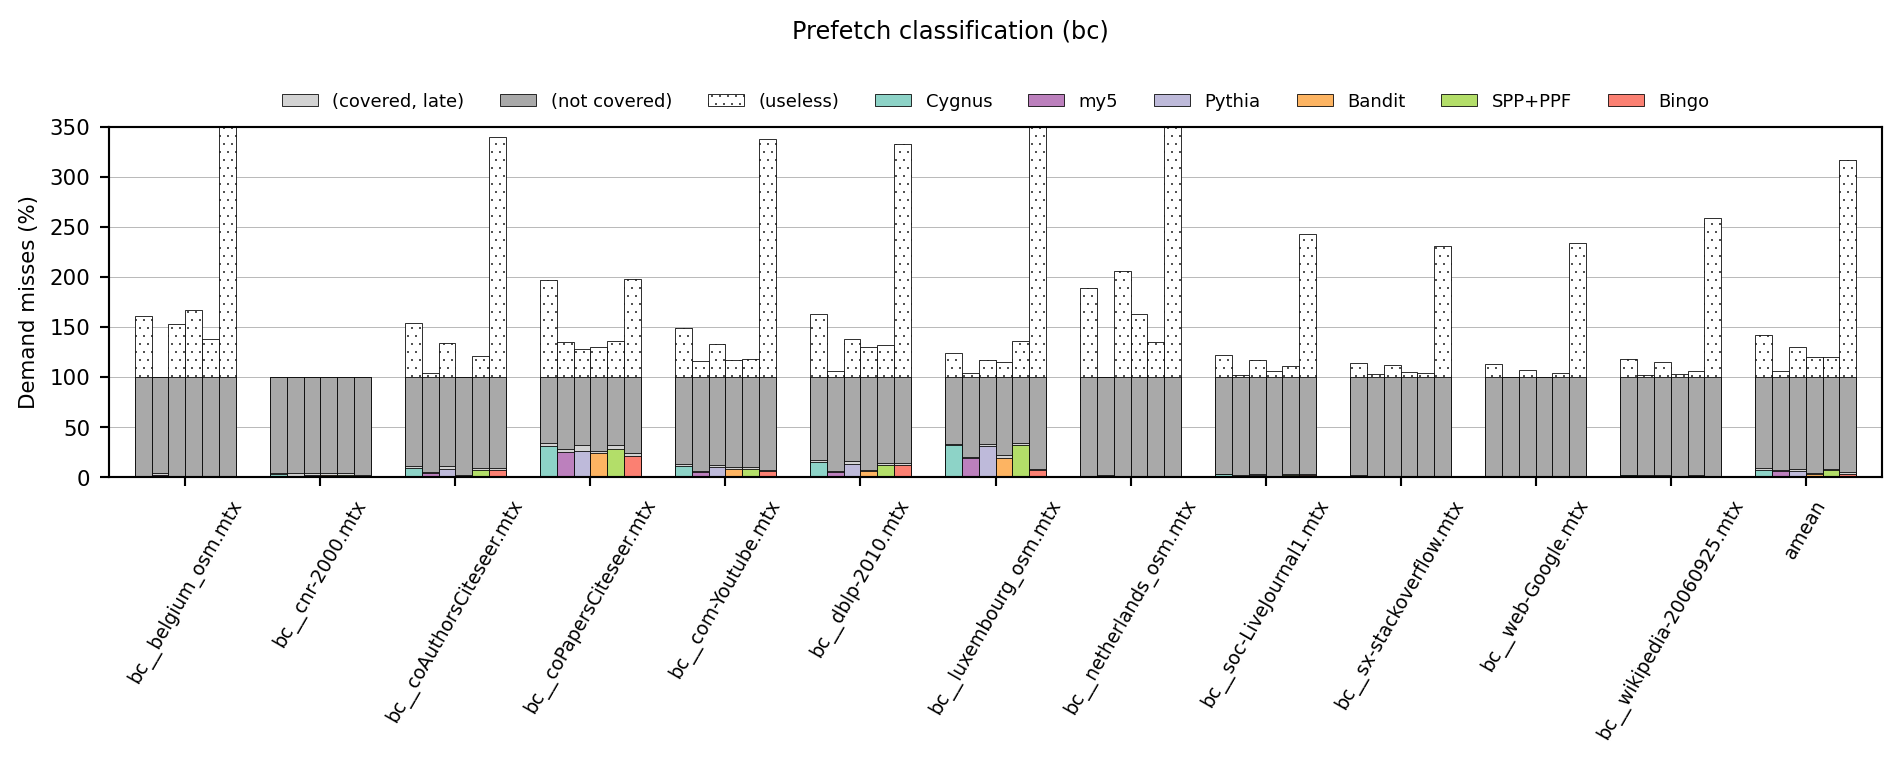

In [164]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "gap_real__bc",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="Prefetch classification (bc)",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(10, 4)
)

#### bfs

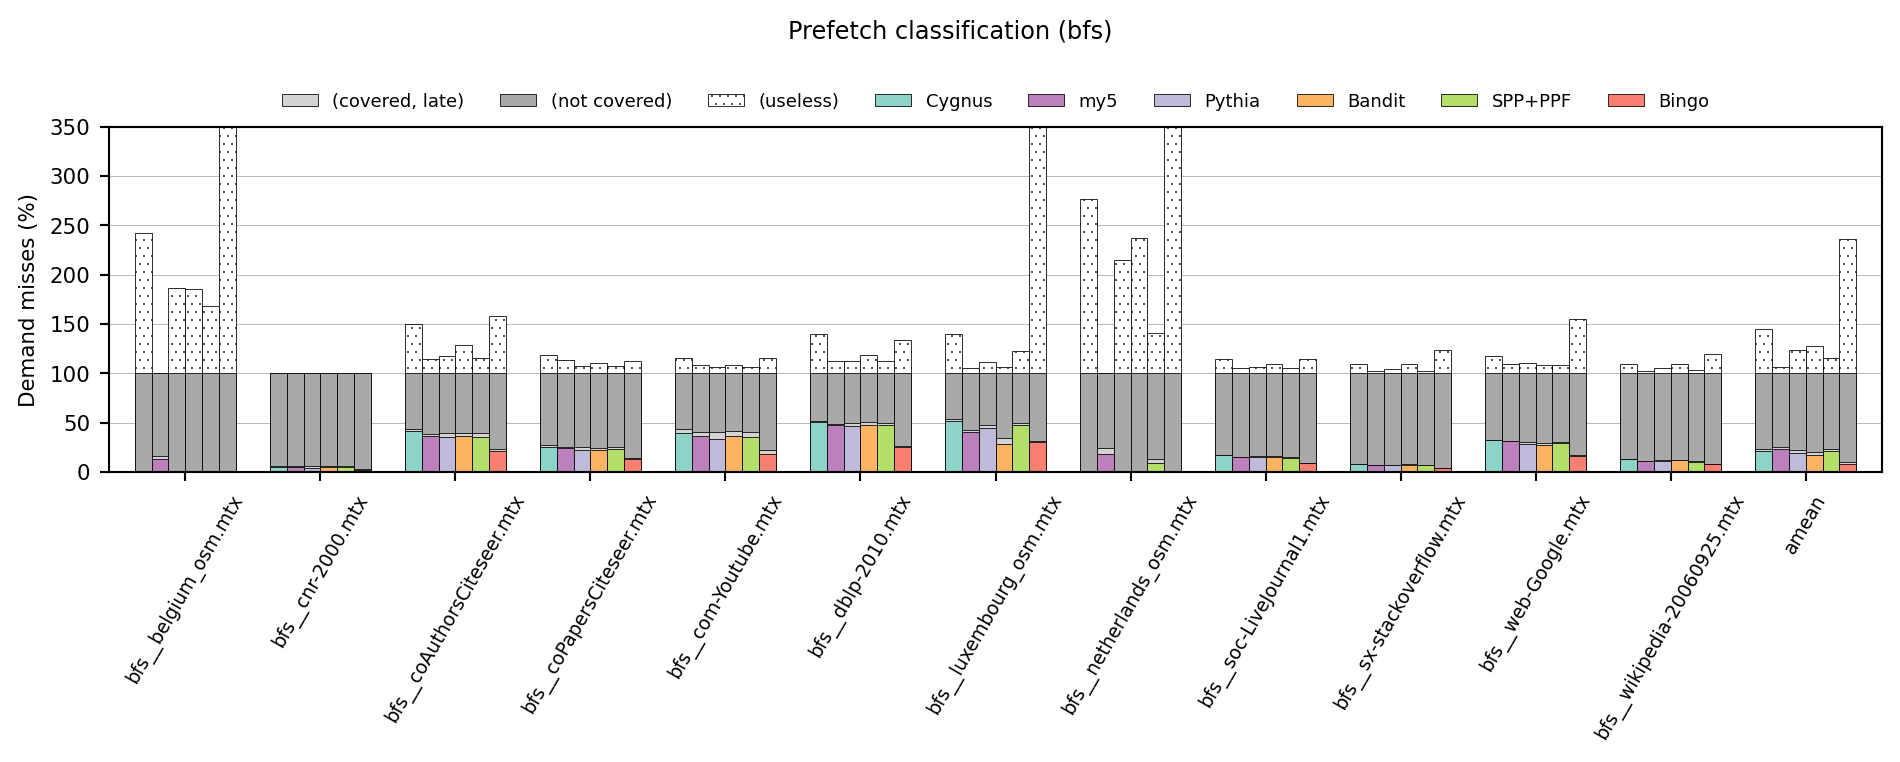

In [165]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "gap_real__bfs",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="Prefetch classification (bfs)",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(10, 4)
)

#### cc

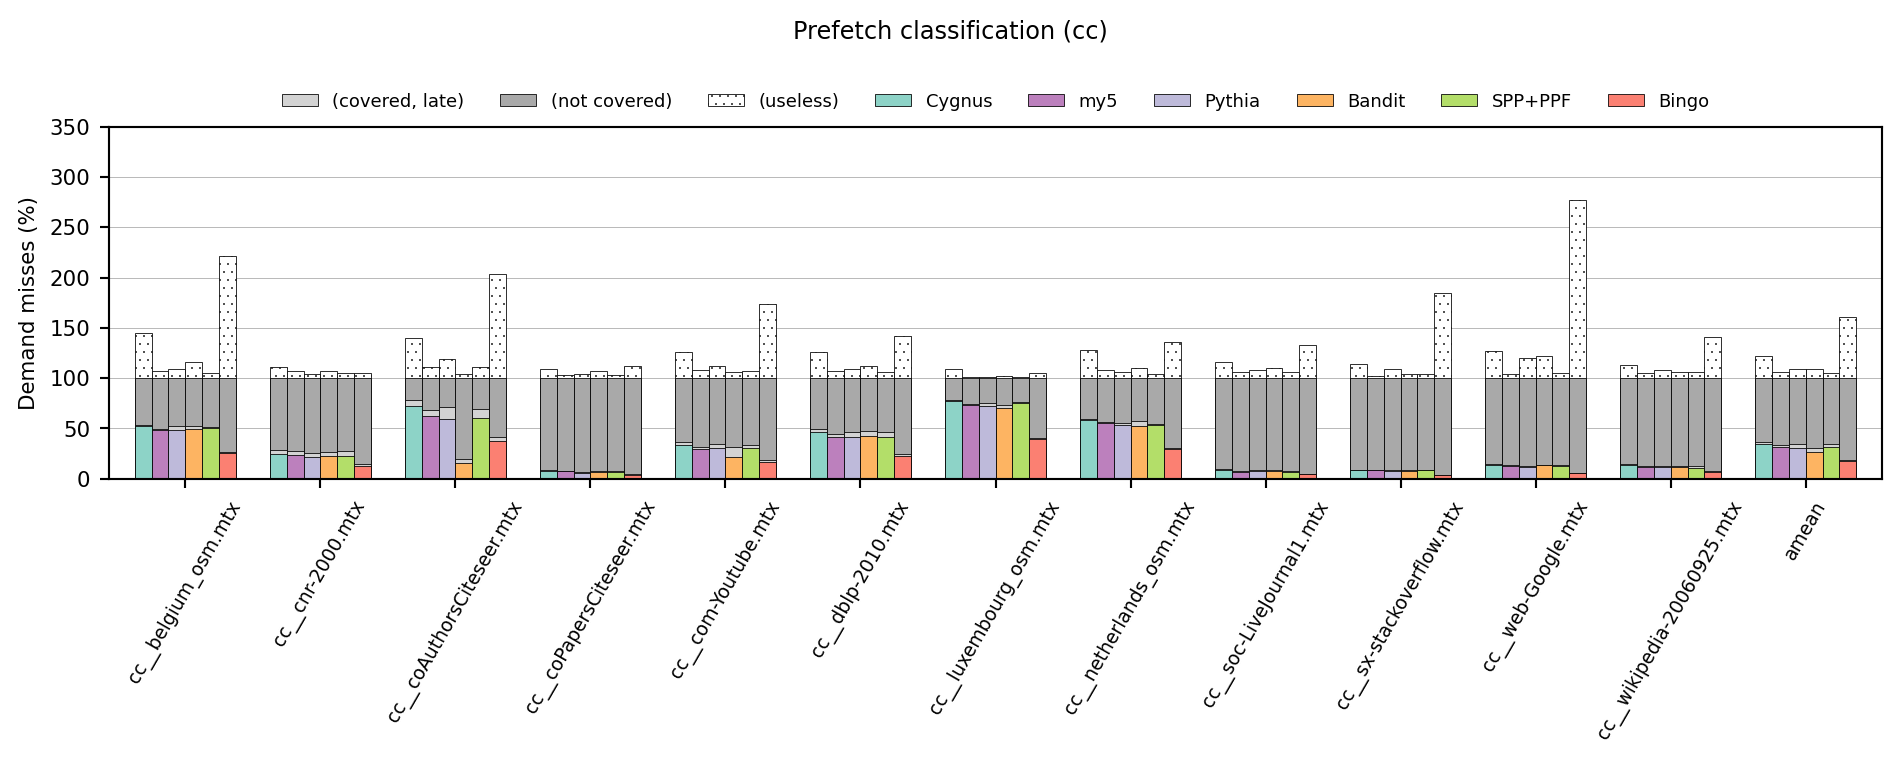

In [166]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "gap_real__cc",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="Prefetch classification (cc)",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(10, 4)
)

#### pr

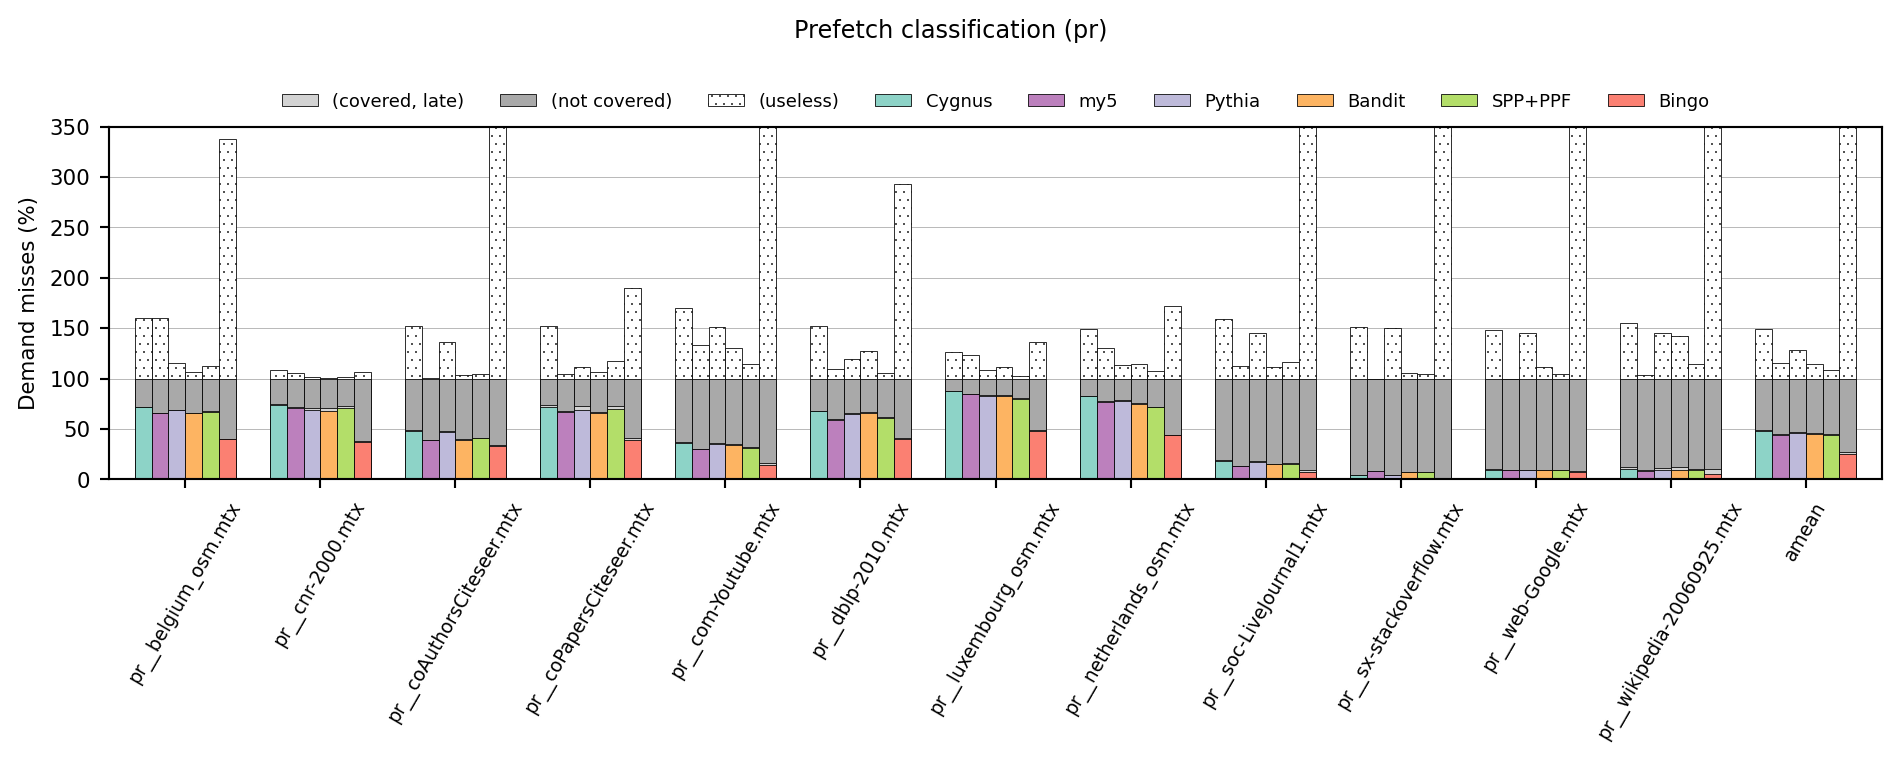

In [167]:
reload(plot)
plot.plot_benchmark_overpredictions(
    degreedyn_1core_df, "gap_real__pr",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs_wide,
    label_kwargs=degreedyn_1core_label_kwargs_small,
    add_suptitle=True,
    suptitle="Prefetch classification (pr)",
    add_xlabel=False,
    ylim=(0, 350),
    ytick_distance=50,
    dpi=192, figsize=(10, 4)
)